In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
human_data = pd.read_csv('input_csvs/human_phantasia_data.csv')
llm_data = pd.read_csv('input_csvs/llm_phantasia_data.csv')

In [3]:
human_data

,ResponseId,001 - Response,002 - Response,003 - Response,004 - Response,005 - Response,006 - Response,007 - Response,008 - Response,009 - Response,...,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_6hazd14Iv0vRJV7,two squares,NaN,key,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...","1. No image at all, you only 'know' that you a...",4. Clear and reasonably vivid,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision
1,R_5vQ6Xf1WugueDND,NaN,NaN,NaN,NaN,two chairs,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid
2,R_5KpdGyLKCFDJS5r,NaN,NaN,NaN,NaN,NaN,House,NaN,Butterfly,Mountain,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
3,R_5hfsgpVmDBRxfr5,NaN,ladder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,2. Vague and dim,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid
4,R_6Eu2oR7CwVBRwyp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,butterfly,butterfly,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,ladder,NaN,NaN,NaN,NaN,NaN,tree,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid
96,R_1paSSMOwVWpJyn2,NaN,NaN,glasses,NaN,NaN,NaN,NaN,bow tie,NaN,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid
97,R_7NhDTJ2fxewY5qh,NaN,Ladder,Circles,NaN,NaN,NaN,NaN,NaN,Butterfly,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,3. Moderately clear and vivid
98,R_5RvyCf53JoQh7Eg,NaN,Ladder,NaN,No idea,The same as previous question,fallen hourglass,Arrow,NaN,Butterfly,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly cle

In [4]:
llm_data

,Model,001,002,003,004,005,006,007,008,009,...,50,51,52,53,54,55,56,57,58,59
0,Anthropic: Claude Opus 4.1 - Multiple Context ...,Ladder,Ladder,Bunny ears,Eyeglasses,Butterfly wings,Eyeglasses,Christmas tree,Human figure,heart,...,Stick figure,Stick figure,Letter F,Sailboat,Music note,Downward arrow,Clock,Hourglass,Umbrella,Upward arrow
1,Anthropic: Claude Sonnet 4 - Multiple Context ...,Ladder,Sideways ladder,Handlebar mustache,Figure eight,Eyeglasses,Eyeglasses,Arrow shaft,Ship anchor,Ship anchor,...,Stick figure,Stick figure,flagpole,Hanging lamp,key,Downward arrow,Flag pole,Railroad crossing,Umbrella,house
2,Anthropic: Claude Sonnet 4 - Single Context - ...,Ladder,Ladder,Barbell,Eyeglasses,Eyeglasses,Butterfly,Arrow,Cheerleader,Cactus,...,Stick figure,House,Coat rack,Hammer,Hockey stick,Arrow,Clock,Railroad crossing,Umbrella,House
3,DeepMind: Gemini 2.0 Flash - Multiple Context ...,Stacked H's,Ladder rungs,bed,bed,Pregnant woman,glasses,hourglass,butterfly,heart,...,Wine glass,keyhole,crosshair,Golf club,Paperclip,arrowhead,Partial logo.,hashtag,Hanging scale,arrowhead
4,DeepMind: Gemini 2.0 Flash - Single Context (2...,Ladder rungs,fence,heart,Belly button,Belly button,Handcuffs,hourglass,hourglass,Cat ears,...,Martini glass,Robot arm,Picket fence,sailboat,Golf club,christmas tree,balloon string,windmill blades,Fishing hook,house
5,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,Stacked letters,Ladder,Dumbbell,Stacked letters,Joined letters,Bow tie,Skewered chevron,Abstract glyph,Stylized emblem,...,inverted trident,Abstract logo,inverted T,Stylized number,Stylized initial,road sign,partial clock,Tilted letter,Stylized monogram,house
6,DeepMind: Gemini 2.5 Pro - Multiple Context - ...,ladder,Three-rung ladder,bed,bed,bed,snail,arrow,Winged Scepter,Butterfly,...,Stick figure,Birdhouse,Shelf bracket,sailboat,skeleton key,Planted sword,Verified icon,Letter Z,anchor,arrow
7,DeepMind: Gemini 2.5 Pro - Single Context - Dy...,ladder,Ladder,Dumbbell,Dumbbell,Dumbbell,eyeglasses,Fletched arrow,Butterfly,Butterfly,...,Stick figure,Medal,Flagpole,Bell,key,Spade symbol,checkmark,Hourglass,Anchor,up arrow
8,OpenAI: ChatGPT-4o - Multiple Context (2025-07...,ladder structure,Train tracks,butterfly wings,owl eyes,glasses,Steering wheel,Rocket exhaust,butterfly,Butterfly,...,Upside-down tree,figure,Flagpole signpost,Flag bracket,music clef,anchor,Broken arrow,hourglass,Elephant trunk,Campfire tripod
9,OpenAI: ChatGPT-4o - Single Context (2025-07-25),ladder,ladder,butterfly,butterfly,butterfly wings,Insect head,hourglass,butterfly,Butterfly,...,tree,crest,flagpole,keyhole,Treble clef,Location marker,arrow,kite,Umbrella,arrow


In [5]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse spaces; '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(header: str) -> int | None:
    """
    Extract leading block number 1..60 from a column header.
    Accepts leading zeros and trailing text.
    """
    m = re.match(r'^\s*0*(\d+)', str(header))
    if not m:
        return None
    b = int(m.group(1))
    return b if 1 <= b <= 60 else None

# 1) Tidy Crowdsourced Data CSV

In [6]:
# Column regex
# Pattern like: b12_q345_label text
_COL_RE = re.compile(r'^(b\d+)_q(\d+)_([\s\S]+)$', re.IGNORECASE)

# Map text responses to numeric scale
TEXT_MAP = {
    "not at all": 1,
    "a little": 2,
    "moderately": 3,
    "a lot": 4,
    "completely": 5,
}

In [7]:
def _to_score(value: str) -> int | None:
    """
    Convert a text response to a numeric score 1..5.
    """
    if value is None:
        return None
    s = str(value).strip()
    if s == "" or s.lower() in {"na", "nan"}:
        return None
    m = re.match(r'^\s*(\d+)', s)
    if m:
        try:
            n = int(m.group(1))
            if 1 <= n <= 5:
                return n
        except ValueError:
            pass
    key = re.sub(r'^\d+\s*[\.\-:]\s*', '', s).lower().strip()
    return TEXT_MAP.get(key, None)

In [8]:
def identify_block_columns(df: pd.DataFrame) -> list:
    """

    :param df:
    :return:
    """

    # Identify block columns in order
    block_cols = []
    for idx, c in enumerate(df.columns):
        m = _COL_RE.match(c)
        if m:
            b, qid, label = m.groups()
            block_cols.append((idx, c, b, qid, label))
    return block_cols

In [9]:
def sort_blocks(block_cols: list) -> dict:
    """
    Sort blocks columns by block id in original position
    :param block_cols:
    :return:
    """
    by_block = {}
    for idx, c, b, qid, label in block_cols:
        by_block.setdefault(b, []).append((idx, c, qid, label))
    for b in by_block:
        by_block[b].sort(key=lambda t: t[0])
    return by_block

In [10]:
def iterate_over_blocks(row, block, resp_id):
    rows = []
    for b, items in block.items():
        repeat = 0
        for _, col, qid, label in items:
            raw = row.get(col, "")  # if the current cell is blank, respondent did not answer so move to next
            score = _to_score(raw)  # convert textual score to numberic
            if score is None:
                continue
            repeat += 1
            mnum = re.match(r'^b(\d+)$', b, re.IGNORECASE)
            block_num = int(mnum.group(1)) if mnum else None
            rows.append({
                "ResponseId": resp_id,
                "block": b,
                "block_num": block_num,
                "repeat_index": repeat,
                "qid": qid,
                "label": label,
                "score": score,
                "raw": raw,
            })
    return rows

In [11]:
def iterate_over_responses(by_block, df):
    """
    Iterate over each response
    :param by_block:
    :param df:
    :return:
    """
    rows = []
    for _, r in df.iterrows():
        resp_id = r.get("ResponseId")
        rows += iterate_over_blocks(r, by_block, resp_id)

    out = pd.DataFrame(rows)
    if not out.empty:
        out["repeat_index"] = pd.to_numeric(out["repeat_index"], errors="coerce")
        out = out.sort_values(by=["ResponseId", "block_num", "repeat_index"],
                              ascending=[True, True, True], na_position="last").reset_index(drop=True)
    return out

In [12]:
def tidy_block_scores(df) -> pd.DataFrame:
    block_cols = identify_block_columns(df)
    by_block = sort_blocks(block_cols)
    return iterate_over_responses(by_block, df)

In [13]:
crowdsourced_data_primary = pd.read_csv('input_csvs/human_response_ranking_data_primary.csv')
crowdsourced_data_secondary = pd.read_csv('input_csvs/human_response_ranking_data_secondary.csv')
crowdsourced_data = pd.concat([crowdsourced_data_primary, crowdsourced_data_secondary], join='outer', ignore_index=True)
crowdsourced_data

,StartDate,EndDate,Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Q1,PID,b1_q1_door knob,...,b44_q1909_question mark,b46_q1910_arch bridge,b55_q1911_Capital T,b57_q1912_Rotated grid,b55_q1913_Planted sword,Q2.1,Q3,Q4.1,Q5,Q6.1
0,2025-08-08 10:03:47,2025-08-08 10:09:21,True,2025-08-08 10:09:22,R_7yOFgP0c0Kfd8aZ,anonymous,EN,Accept,62e05a40c77214b0772d5596,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-08-08 10:05:08,2025-08-08 10:14:37,True,2025-08-08 10:14:37,R_5yrOnDogUCzSTjL,anonymous,EN,Accept,5dda9b9a9d9e30a06d320ffb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-08-08 10:14:18,2025-08-08 10:19:55,True,2025-08-08 10:19:56,R_3jZ1B5pAuPBnE0S,anonymous,EN,Accept,65ca9c729a13f898ae374552,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-08-08 10:10:27,2025-08-08 10:23:29,True,2025-08-08 10:23:31,R_7axyHC8c9d19RTG,anonymous,EN,Accept,6734c699d11234d19b0be0ec,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-08-08 10:48:59,2025-08-08 10:54:42,True,2025-08-08 10:54:43,R_1zrZGpupYQtYXYJ,anonymous,EN,Accept,669327c8eb71f9a6ca83eaab,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2025-09-18 14:15:17,2025-09-18 14:22:06,True,2025-09-18 14:22:07,R_1H76q55CMEtLRGy,anonymous,EN,Accept,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,none,Instructions were easy to follow.,59.0,female,English
366,2025-09-18 14:15:00,2025-09-18 14:29:00,True,2025-09-18 14:29:01,R_3CN209Tuuyv68ty,anonymous,EN,Accept,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,I did not.,There was one description that I had never hea...,36.0,woman,English
367,2025-09-18 14:40:39,2025-09-18 14:47:15,True,2025-09-18 14:47:16,R_7pgvy0k0EPrRvlT,anonymous,EN,Accept,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nothing,59.0,Female,English
368,2025-09-18 14:17:52,2025-09-18 14:51:09,True,2025-09-18 14:51:10,R_3TaBks0sj7wDAm5,anonymous,EN,Accept,NaN,NaN,...,NaN,NaN,NaN,NaN,Completely,Everything worked,I liked the survey,35.0,MAle,English


In [14]:
expert_crowdsourced_data_primary = pd.read_csv("input_csvs/expert_response_ranking_data_primary.csv")
expert_crowdsourced_data_secondary = pd.read_csv("input_csvs/expert_response_ranking_data_secondary.csv")
expert_crowdsourced_data = pd.concat([expert_crowdsourced_data_primary, expert_crowdsourced_data_secondary], join='outer', ignore_index=True)
expert_crowdsourced_data

,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,...,b27_q1903_X,b28_q1904_face with eyes,b29_q1905_mushroom,b32_q1906_table lamp,b37_q1907_3 leaf clover,b43_q1908_key,b44_q1909_question mark,b46_q1910_arch bridge,b55_q1911_Capital T,b57_q1912_Rotated grid
0,2025-08-19 15:20:16,R_5PAMRt4s9LlEvnx,NaN,NaN,NaN,NaN,42.3253,-71.0951,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-09-17 11:57:19,R_7EYGvtUpelTVayC,NaN,NaN,NaN,NaN,42.3253,-71.0951,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-09-17 13:23:58,R_17vf6ukupwbbFCy,NaN,NaN,NaN,NaN,42.3253,-71.0951,anonymous,EN,...,Not at all,Moderately,Not at all,Completely,Completely,Not at all,Not at all,Not at all,Not at all,Not at all
3,2025-09-17 13:43:29,R_6llAy1fOvV7sf1G,NaN,NaN,NaN,NaN,42.3253,-71.0951,anonymous,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tidy_crowdsourced_data = tidy_block_scores(crowdsourced_data)
tidy_crowdsourced_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_10qMKOFXS2FbriN,b2,2,1,8,H,2,A little
1,R_10qMKOFXS2FbriN,b3,3,1,28,doorway,1,Not at all
2,R_10qMKOFXS2FbriN,b4,4,1,56,music notes,5,Completely
3,R_10qMKOFXS2FbriN,b4,4,2,59,spectacles,1,Not at all
4,R_10qMKOFXS2FbriN,b10,10,1,146,cyrillic letter,5,Completely
...,...,...,...,...,...,...,...,...
11005,R_7yOFgP0c0Kfd8aZ,b47,47,2,1118,musical clef,1,Not at all
11006,R_7yOFgP0c0Kfd8aZ,b53,53,1,1243,Boat,5,Completely
11007,R_7yOFgP0c0Kfd8aZ,b53,53,2,1251,musical note,1,Not at all
11008,R_7yOFgP0c0Kfd8aZ,b56,56,1,1316,verified icon,1,Not at all


In [16]:
tidy_expert_data = tidy_block_scores(expert_crowdsourced_data)
tidy_expert_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_17vf6ukupwbbFCy,b6,6,1,1893,Digit 8,1,Not at all
1,R_17vf6ukupwbbFCy,b9,9,1,1894,owl face,1,Not at all
2,R_17vf6ukupwbbFCy,b10,10,1,1895,inverted comb,1,Not at all
3,R_17vf6ukupwbbFCy,b13,13,1,1896,greek phi,1,Not at all
4,R_17vf6ukupwbbFCy,b16,16,1,1897,map pin,4,A lot
...,...,...,...,...,...,...,...,...
1907,R_7EYGvtUpelTVayC,b59,59,10,1888,Arrowhead ladder,1,Not at all
1908,R_7EYGvtUpelTVayC,b59,59,11,1889,Bridge arch,1,Not at all
1909,R_7EYGvtUpelTVayC,b59,59,12,1890,Christmas tree,4,A lot
1910,R_7EYGvtUpelTVayC,b59,59,13,1891,planted tree,5,Completely


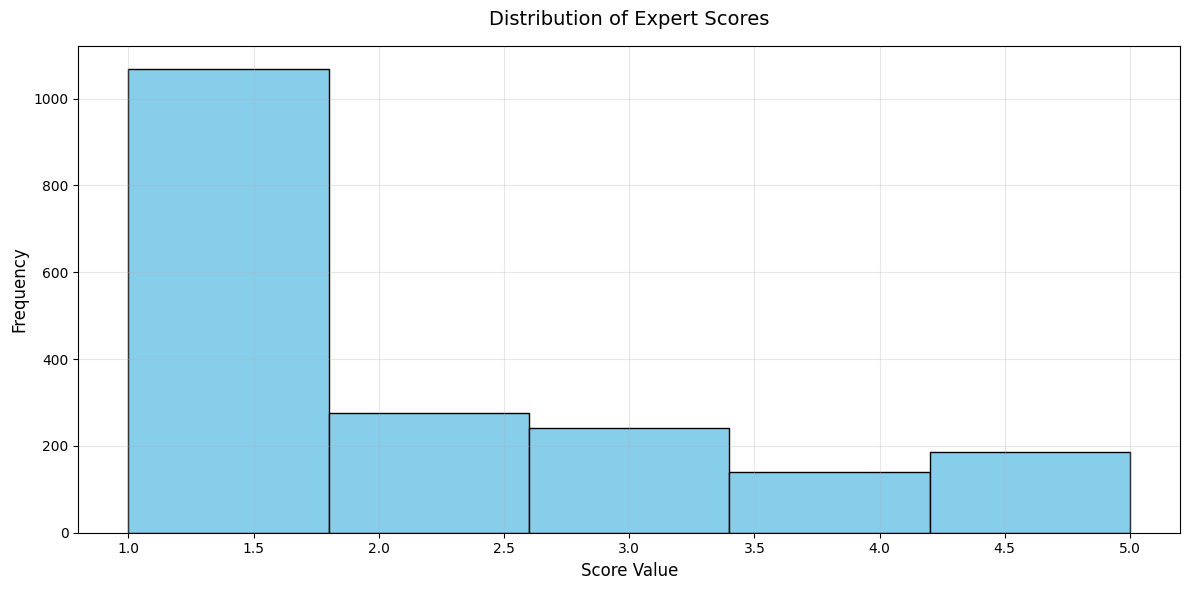

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(tidy_expert_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Expert Scores', pad=15, fontsize=14)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
tidy_crowdsourced_data.to_csv("output_csvs/tidy_crowdsourced_data.csv")
tidy_expert_data.to_csv("output_csvs/tidy_expert_data.csv")

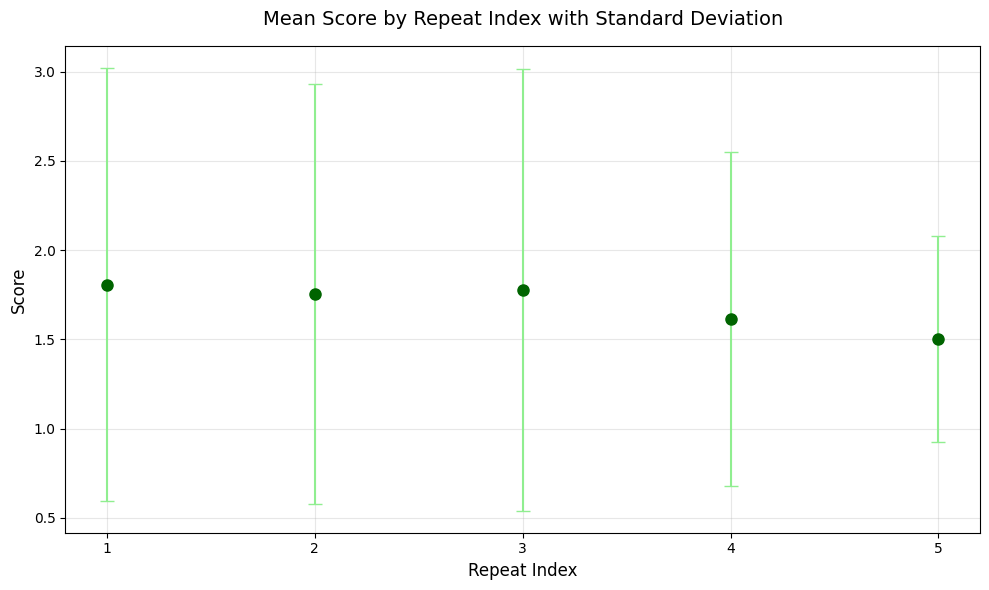

In [19]:
repeat_scores = tidy_crowdsourced_data.groupby('repeat_index')['score'].agg(['mean', 'std'])

plt.figure(figsize=(10, 6))
plt.errorbar(repeat_scores.index, repeat_scores['mean'],
             yerr=repeat_scores['std'], fmt='o', capsize=5,
             color='darkgreen', ecolor='lightgreen', markersize=8)
plt.title('Mean Score by Repeat Index with Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Repeat Index', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

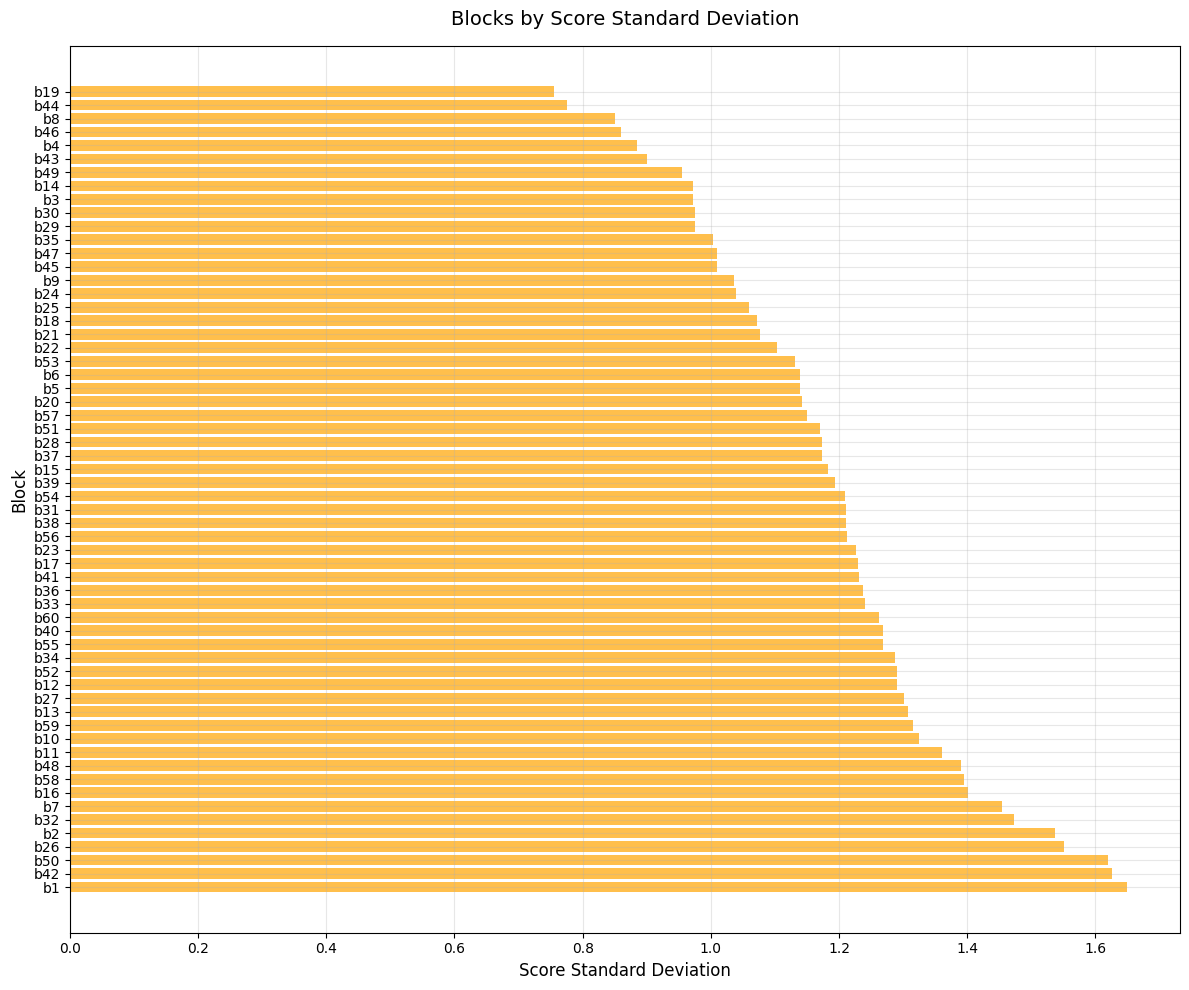

In [20]:
score_std = tidy_crowdsourced_data.groupby('block')['score'].std()
sorted_std = score_std.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(range(len(sorted_std)), sorted_std.values, color='orange', alpha=0.7)
plt.title('Blocks by Score Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Score Standard Deviation', fontsize=12)
plt.ylabel('Block', fontsize=12)
plt.yticks(range(len(sorted_std)), sorted_std.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

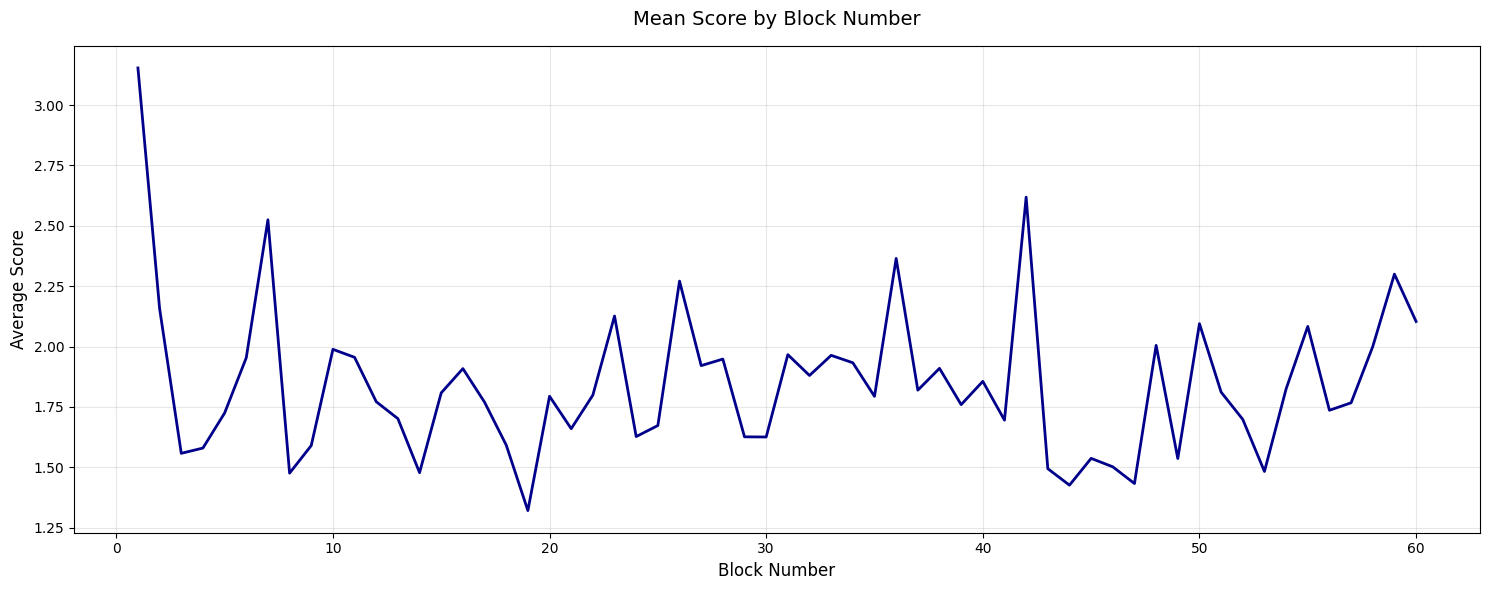

In [21]:
import matplotlib.pyplot as plt

score_by_block = tidy_crowdsourced_data.groupby('block_num')['score'].mean()

plt.figure(figsize=(15, 6))
plt.plot(score_by_block.index, score_by_block.values, color='darkblue', linewidth=2)
plt.title('Mean Score by Block Number', fontsize=14, pad=15)
plt.xlabel('Block Number', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

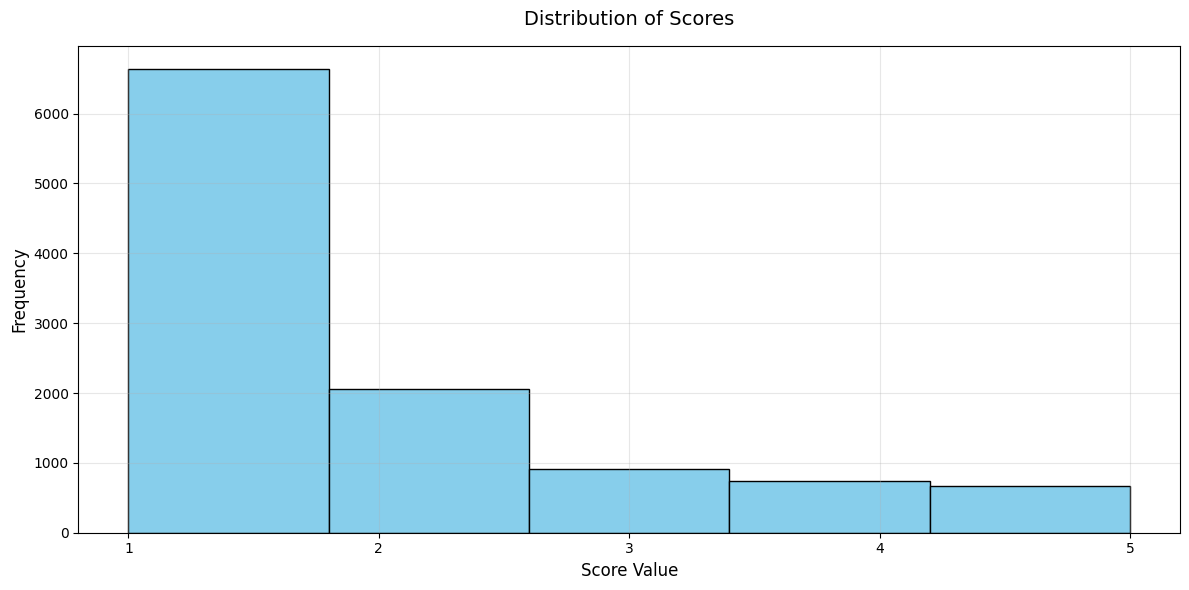

In [22]:
plt.figure(figsize=(12, 6))
plt.hist(tidy_crowdsourced_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores', fontsize=14, pad=15)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# 2 ) Overall Mean Per Label and Per Block+QID

In [23]:
def values_wide_with_stats(df_tidy: pd.DataFrame, df_expert=None) -> pd.DataFrame:
    """
    group_by: 'label'
    """
    df = df_tidy.copy()
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score", "label"])
    df["label"] = df["label"].astype(str).str.strip()
    df["block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    df["qid"] = pd.to_numeric(df["qid"], errors="coerce")
    group_cols = ["block_num", "qid", "label"]
    index_cols = group_cols
    df["_seq"] = df.groupby(group_cols).cumcount() + 1
    wide = df.pivot_table(index=index_cols, columns="_seq", values="score", aggfunc="first")
    wide.columns = [f"value_{int(c)}" for c in wide.columns]
    wide = wide.reset_index()
    val_cols = [c for c in wide.columns if c.startswith("value_")]
    wide["normal_mean_score"] = wide[val_cols].mean(axis=1, skipna=True)
    wide["normal_sd_score"] = wide[val_cols].std(axis=1, ddof=0, skipna=True)

    if df_expert is not None:
        exp_df = values_wide_with_stats(df_expert)
        cols = [c for c in exp_df.columns if c.startswith("value_")]
        expert_cols = [c.replace("value", "expert_value") for c in cols]
        for c, e in zip(cols, expert_cols):
            exp_df.rename({c: e}, axis=1, inplace=True)
        exp_df.rename({"normal_mean_score": "expert_mean_score", "normal_sd_score": "expert_sd_score"}, axis=1,
                      inplace=True)
        wide = pd.merge(wide, exp_df, on=["label", "block_num", "qid"], how='outer', validate='m:m')
        wide["average_mean_score"] = (wide["expert_mean_score"] + wide["normal_mean_score"]) / 2

    return wide

In [24]:
CANON_WORDS = [
    "Ladder",
    "Ladder",
    "Glasses",
    "Glasses",
    "Glasses",
    "Glasses",
    "Pine Tree",
    "Butterfly",
    "Butterfly",
    "Comb - Pitchfork",
    "Comb - Pitchfork",
    "Goblet",
    "Goblet",
    "Computer Mouse",
    "House",
    "Ice cream",
    "Ice cream",
    "Ice cream",
    "Computer Mouse",
    "Crystal ball - Person Outline",
    "Crystal ball - Person Outline",
    "Fish",
    "Lollipop",
    "Chair",
    "Chair",
    "Flag",
    "Door",
    "Glasses",
    "Shovel",
    "Fish bones",
    "Balloon",
    "Goblet",
    "Plunger",
    "Bow tie - Owl",
    "Bow tie - Owl",
    "Broom",
    "Clubs symbol",
    "Clubs symbol - Ice cream",
    "Clubs symbol - Ice cream",
    "Mug",
    "Mug",
    "Window - Grid",
    "Mouse",
    "Computer Mouse",
    "Clock",
    "Lightbulb - Ice Cream",
    "Computer Mouse",
    "Letter T",
    "Heart",
    "Stick Figure",
    "Television",
    "Letter F",
    "Sailboat",
    "Music Note",
    "Yield Sign - Martini Glass",
    "Clock",
    "Hourglass",
    "Umbrella",
    "Pine tree",
    "House",
]

In [25]:
def add_canon_between_qid_label(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    if "block_num" not in df2.columns:
        raise ValueError("add_canon_between_qid_label: requires a 'block_num' column.")
    df2["block_num"] = pd.to_numeric(df2["block_num"], errors="coerce")
    mapping = {i + 1: w for i, w in enumerate(CANON_WORDS)}
    df2["canon"] = df2["block_num"].map(mapping)
    if "qid" in df2.columns and "label" in df2.columns:
        cols = []
        for c in df2.columns:
            cols.append(c)
            if c == "qid":
                cols.append("canon")
        seen, ordered = set(), []
        for c in cols:
            if c not in seen:
                seen.add(c)
                ordered.append(c)
        df2 = df2[ordered]
    return df2

In [26]:
means_per_block_qid = values_wide_with_stats(tidy_crowdsourced_data, tidy_expert_data)
means_with_canon = add_canon_between_qid_label(means_per_block_qid)
means_with_canon

,block_num,qid,canon,label,value_1,value_2,value_3,value_4,value_5,value_6,value_7,normal_mean_score,normal_sd_score,expert_value_1,expert_mean_score,expert_sd_score,average_mean_score
0,21,1553,Crystal ball - Person Outline,2 circles,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.000000,0.000000,1,1.0,0.0,1.000000
1,27,1609,Door,2 square stacked into each other,1.0,1.0,1.0,2.0,5.0,NaN,NaN,2.000000,1.549193,1,1.0,0.0,1.500000
2,27,576,Door,2 squares,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.285714,0.699854,1,1.0,0.0,1.142857
3,37,1907,Clubs symbol,3 leaf clover,2.0,3.0,4.0,5.0,3.0,NaN,NaN,3.400000,1.019804,5,5.0,0.0,4.200000
4,42,1731,Window - Grid,3x3 grid,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.000000,0.000000,2,2.0,0.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,19,387,Computer Mouse,ying yang,1.0,1.0,2.0,1.0,1.0,1.0,NaN,1.166667,0.372678,1,1.0,0.0,1.083333
1908,43,1005,Mouse,yo-yo,4.0,1.0,2.0,1.0,2.0,4.0,NaN,2.333333,1.247219,4,4.0,0.0,3.166667
1909,2,17,Ladder,zibracrossing,2.0,2.0,1.0,1.0,2.0,4.0,NaN,2.000000,1.000000,5,5.0,0.0,3.500000
1910,57,1337,Hourglass,zipper,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.166667,0.372678,1,1.0,0.0,1.083333


In [27]:
means_with_canon.to_csv("output_csvs/means_with_canon.csv")

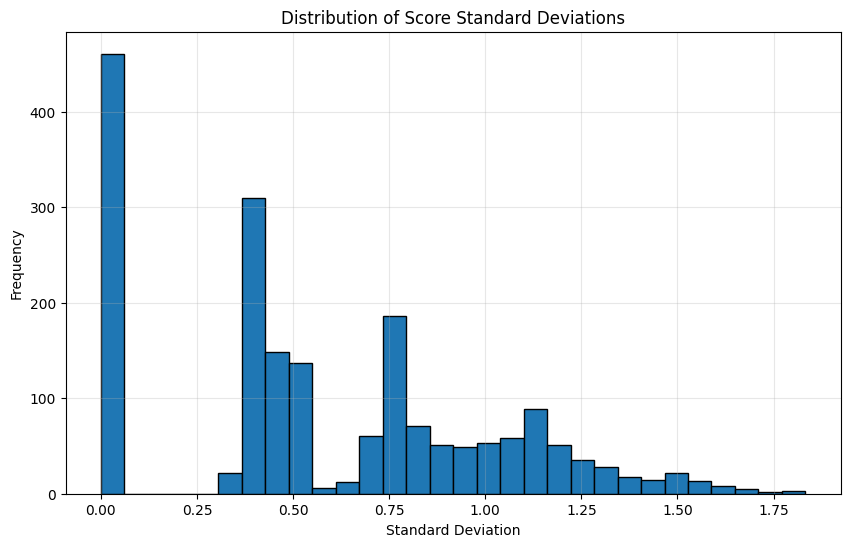

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['normal_sd_score'], bins=30, edgecolor='black')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Score Standard Deviations')
plt.grid(True, alpha=0.3)

plt.show()

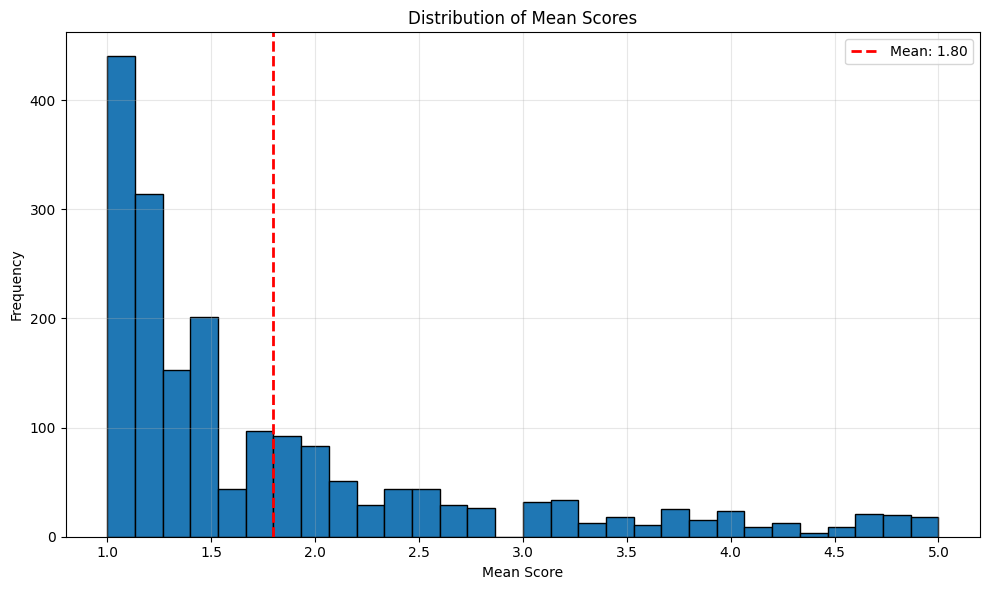

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['normal_mean_score'], bins=30, edgecolor='black')
plt.axvline(means_with_canon['normal_mean_score'].mean(), color='red', linestyle='dashed',
            linewidth=2, label=f'Mean: {means_with_canon["normal_mean_score"].mean():.2f}')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3 ) VVIQ Scores

In [30]:
def extract_leading_number(series: pd.Series) -> pd.Series:
    """
    From strings like '1 Very vivid' or '  4 - Barely vivid',
    extract the leading integer. Returns float with NaN on failure.
    """
    s = series.astype(str)
    # grab the first integer at the start of the string
    nums = s.str.extract(r'^\s*(\d+)')[0]
    return pd.to_numeric(nums, errors="coerce")

In [31]:
def get_vviq_scores(df: pd.DataFrame) -> pd.DataFrame:
    vviq_column_regex = r'^VVIQ\s*[-–]\s*\d{2}$'
    vviq_columns = [c for c in df.columns if re.match(vviq_column_regex, c)]
    if not vviq_columns:
        raise ValueError("get_VVIQ_scores: no vviq columns")
    vviq_numeric = pd.DataFrame(
        {c: extract_leading_number(df[c]) for c in vviq_columns}
    )
    base = df[['ResponseId']].copy()
    scored = pd.concat([base, vviq_numeric], axis=1)
    scored.insert(loc=1, column='VVIQ_sum', value=vviq_numeric.sum(axis=1, min_count=1))
    scored.insert(loc=2, column='VVIQ_mean', value=vviq_numeric.mean(axis=1))
    scored.insert(loc=3, column='VVIQ_std', value=vviq_numeric.std(axis=1, ddof=1))
    return scored

In [32]:
pre_vviq = human_data.reset_index(drop=True)
vviq_scores = get_vviq_scores(pre_vviq)
vviq_scores

,ResponseId,VVIQ_sum,VVIQ_mean,VVIQ_std,VVIQ - 01,VVIQ - 02,VVIQ - 03,VVIQ - 04,VVIQ - 05,VVIQ - 06,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_6hazd14Iv0vRJV7,56,3.5000,1.825742,1,1,4,3,5,5,5,5,1,1,4,1,5,5,5,5
1,R_5vQ6Xf1WugueDND,70,4.3750,0.718795,3,4,3,4,4,5,5,5,5,5,4,4,5,5,5,4
2,R_5KpdGyLKCFDJS5r,61,3.8125,1.515201,4,2,1,3,5,5,5,5,5,5,2,5,1,5,4,4
3,R_5hfsgpVmDBRxfr5,45,2.8125,0.403113,3,3,3,2,3,2,3,3,3,2,3,3,3,3,3,3
4,R_6Eu2oR7CwVBRwyp,56,3.5000,0.816497,3,4,3,3,4,5,5,5,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,63,3.9375,0.771902,4,4,3,4,4,4,5,5,5,5,4,3,3,3,3,4
96,R_1paSSMOwVWpJyn2,53,3.3125,0.793200,3,3,2,2,4,4,4,4,3,3,2,3,4,4,4,4
97,R_7NhDTJ2fxewY5qh,53,3.3125,1.014479,2,3,1,4,3,4,4,4,2,3,4,4,3,4,5,3
98,R_5RvyCf53JoQh7Eg,71,4.4375,0.629153,4,4,3,4,5,5,5,5,4,4,5,4,5,5,5,4


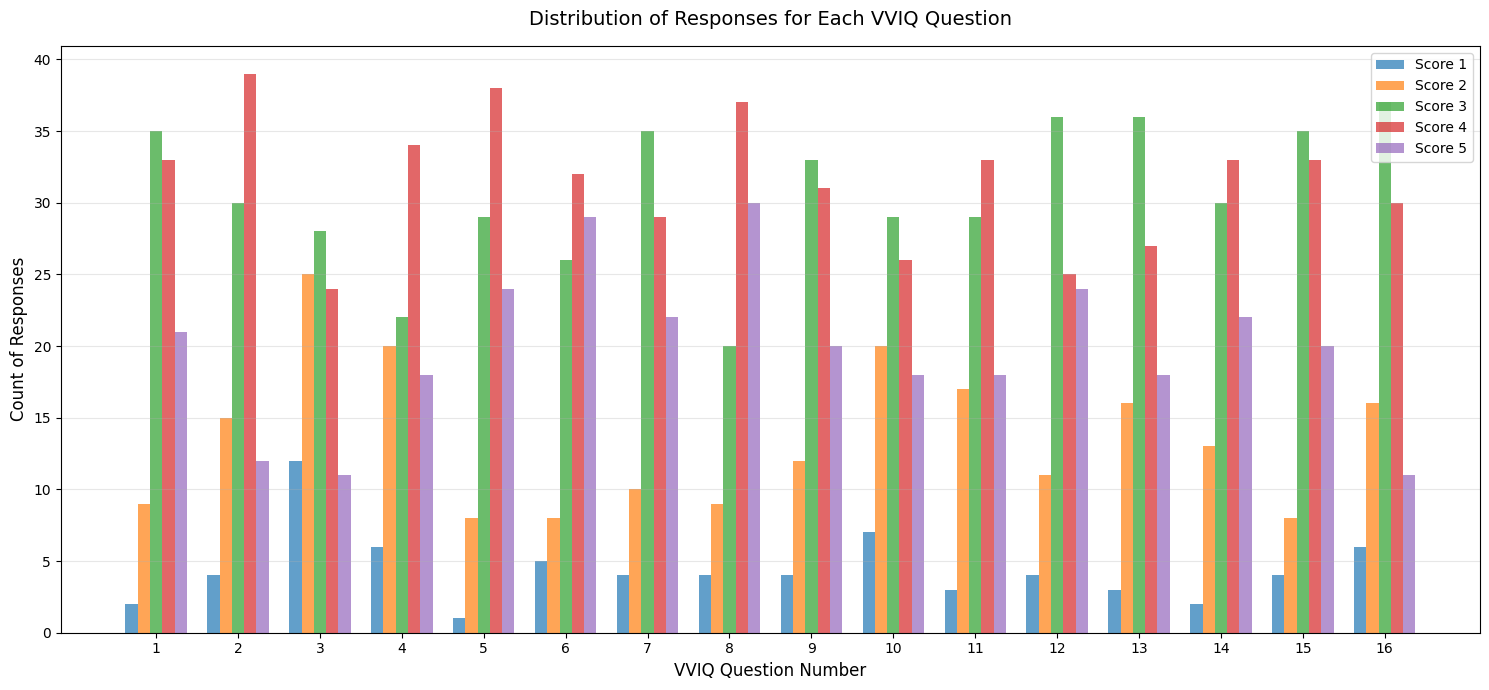

In [33]:
response_counts = {i: [len(vviq_scores[vviq_scores[f'VVIQ - {str(j).zfill(2)}'] == i])
                       for j in range(1, 17)] for i in range(1, 6)}

vviq_vals = np.arange(1, 17)
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(15, 7))

for response, counts in response_counts.items():
    offset = width * multiplier
    ax.bar(vviq_vals + offset, counts, width, label=f'Score {response}', alpha=0.7)
    multiplier += 1

ax.set_xlabel('VVIQ Question Number', fontsize=12)
ax.set_ylabel('Count of Responses', fontsize=12)
ax.set_title('Distribution of Responses for Each VVIQ Question', fontsize=14, pad=15)
ax.set_xticks(vviq_vals + width * 2)
ax.set_xticklabels(range(1, 17))
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

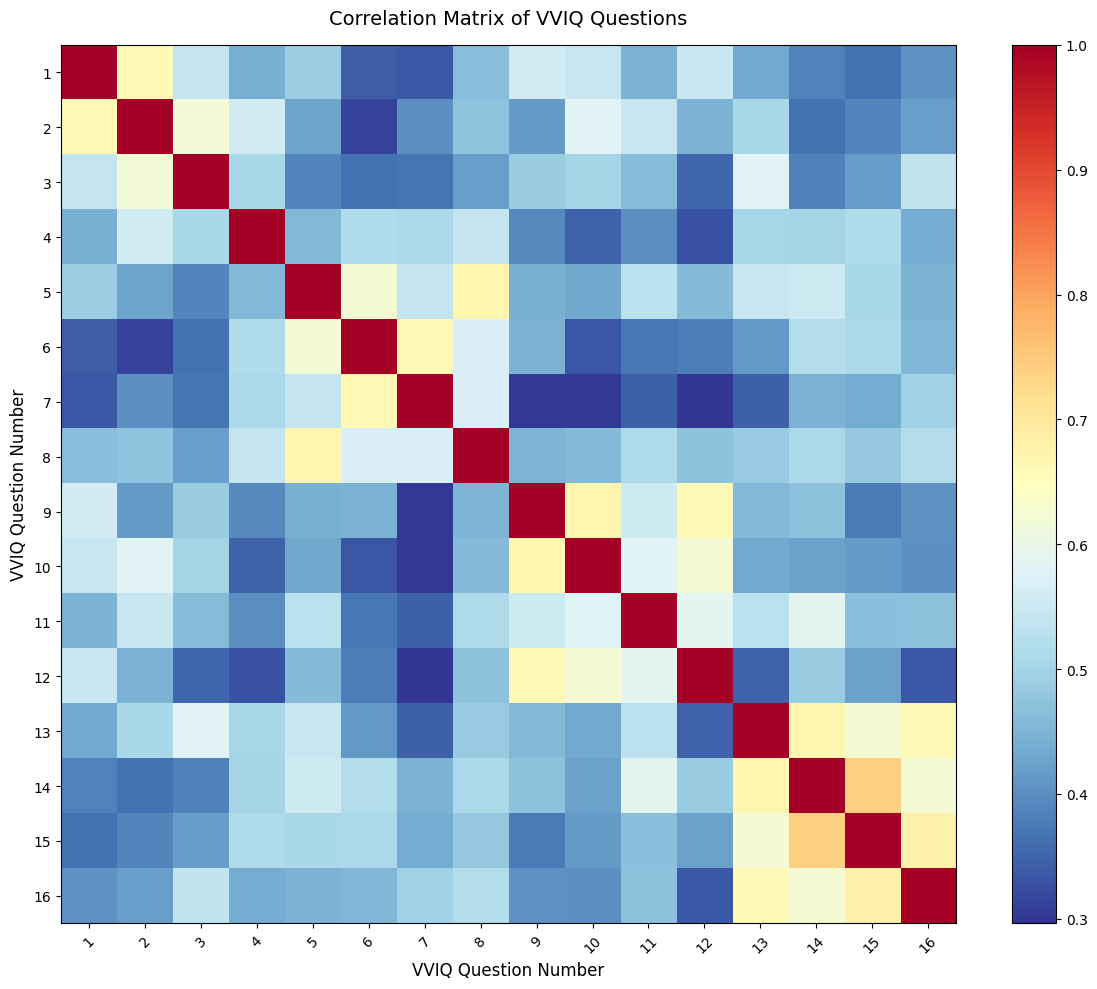

In [34]:
correlations = vviq_scores[[f'VVIQ - {str(i).zfill(2)}' for i in range(1, 17)]].corr()

plt.figure(figsize=(12, 10))
im = plt.imshow(correlations, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(im)
plt.xticks(range(16), range(1, 17), rotation=45)
plt.yticks(range(16), range(1, 17))
plt.xlabel('VVIQ Question Number', fontsize=12)
plt.ylabel('VVIQ Question Number', fontsize=12)
plt.title('Correlation Matrix of VVIQ Questions', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

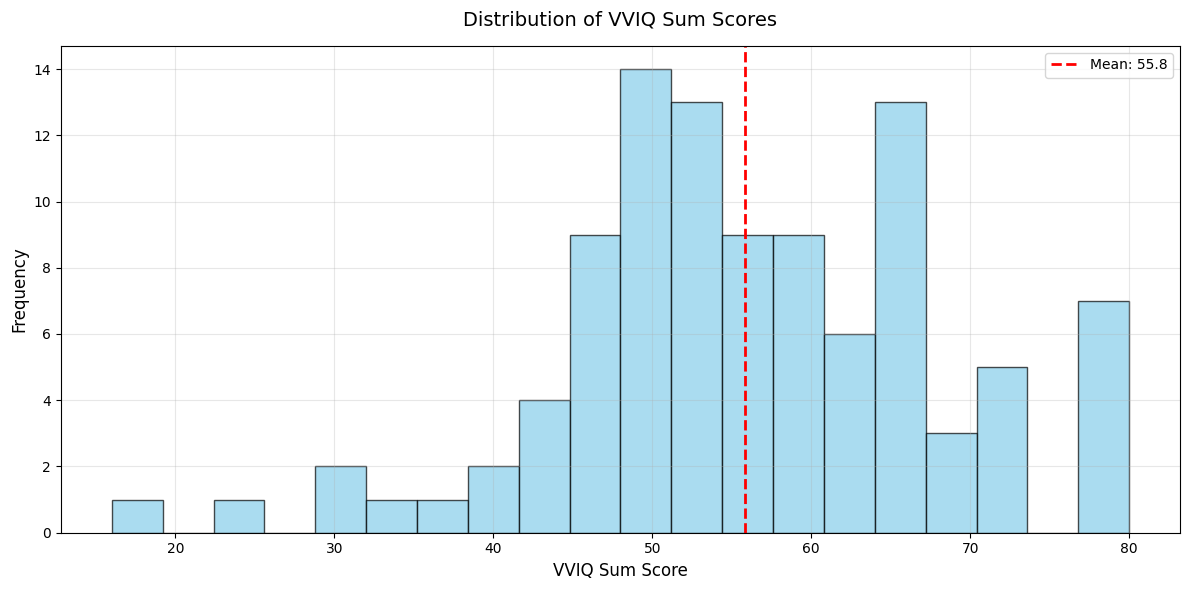

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(vviq_scores['VVIQ_sum'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(vviq_scores['VVIQ_sum'].mean(), color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {vviq_scores["VVIQ_sum"].mean():.1f}')
plt.xlabel('VVIQ Sum Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of VVIQ Sum Scores', fontsize=14, pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
vviq_scores.to_csv("output_csvs/vviq_scores.csv")

# 4) Grading

In [37]:
FINKE_BLOCKS = list(range(48, 59 + 1))
NOVEL_BLOCKS = [x for x in range(1, 60 + 1) if x not in FINKE_BLOCKS]
ALL_BLOCKS = list(range(1, 60 + 1))
FINKE_BLOCKS, NOVEL_BLOCKS, ALL_BLOCKS

([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  60],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60])

In [38]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse internal whitespace. Returns '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)


def parse_block(col_name: str, block_list: list):
    """
    Extract leading block number from a header.
      '01' -> 1
      '01 - Block' -> 1
      '5_block' -> 5
      '060 final' -> 60
    Returns int in 1..60 or None.
    """
    m = re.match(r'^\s*0*(\d+)', str(col_name))
    if not m:
        return None
    bnum = int(m.group(1))
    return bnum if bnum in block_list else None


In [39]:
def sort_blocks(df, block_list):
    block_cols = []
    for i, col in enumerate(df.columns):
        if col == 'ResponseId' or col == 'Model':
            continue
        bnum = parse_block(col, block_list)
        if bnum is not None:
            block_cols.append((col, bnum, i))
    block_cols.sort(key=lambda t: t[2])  # preserve file order
    return block_cols

In [40]:
def build_lookup(df):
    new_df = pd.DataFrame()
    new_df["_block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    new_df["_label_norm"] = df["label"].map(norm_text)
    new_df["_normal_mean_score"] = pd.to_numeric(df["normal_mean_score"], errors="coerce")
    new_df["_expert_mean_score"] = pd.to_numeric(df["expert_mean_score"], errors="coerce")
    new_df["_average_mean_score"] = pd.to_numeric(df["average_mean_score"], errors="coerce")
    new_df["_mc1"] = pd.to_numeric(df["value_1"], errors="coerce")
    new_df["_mc2"] = pd.to_numeric(df["value_2"], errors="coerce")
    new_df["_mc3"] = pd.to_numeric(df["value_3"], errors="coerce")
    new_df["_mc4"] = pd.to_numeric(df["value_4"], errors="coerce")
    new_df["_mc5"] = pd.to_numeric(df["value_5"], errors="coerce")
    new_df["_mc6"] = pd.to_numeric(df["value_6"], errors="coerce")
    new_df["_mc7"] = pd.to_numeric(df["value_7"], errors="coerce")
    new_df["_ec1"] = pd.to_numeric(df["expert_value_1"], errors="coerce")
    #new_df["_ec2"] = pd.to_numeric(df["expert_value_2"], errors="coerce")
    return {(int(b), l): [float(m), float(e), float(a), float(mc1), float(mc2), float(mc3), float(mc4), float(mc5),
                          float(mc6), float(mc7), float(ec1)]
            for b, l, m, e, a, mc1, mc2, mc3, mc4, mc5, mc6, mc7, ec1 in new_df.itertuples(index=False, name=None)}

In [41]:
def grade(responses_df, means_df, key_col, block_list=ALL_BLOCKS) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    usable_means = build_lookup(means_df)
    block_cols = sort_blocks(responses_df, block_list)
    result_list = []
    full_results = []
    ungraded_results = []
    for _, row in responses_df.iterrows():
        key_val = row[key_col]
        normal_total = 0.0
        expert_total = 0.0
        average_total = 0.0
        n_total = 0
        n_graded = 0
        n_ungraded = 0
        for col, bnum, _ in block_cols:
            label_original = str(row.get(col, "")).strip()
            if label_original == "nan":
                continue
            n_total += 1
            label_norm = norm_text(label_original)
            mean_with_components = usable_means.get((bnum, label_norm))
            if mean_with_components is None:
                normal_total += 1
                expert_total += 1
                average_total += 1
                n_ungraded += 1
                ungraded_results.append(
                    {
                        key_col: key_val,
                        "label": label_norm,
                        "raw": label_original,
                        "block": bnum,
                    }
                )
            else:
                n_graded += 1
                normal_total += mean_with_components[0]
                expert_total += mean_with_components[1]
                average_total += mean_with_components[2]

                full_results.append(
                    {key_col: key_val,
                     "label": label_norm,
                     "raw": label_original,
                     "block": bnum,
                     "canon": CANON_WORDS[bnum-1],
                     "normal_mean": mean_with_components[0],
                     "expert_mean": mean_with_components[1],
                     "average_mean": mean_with_components[2],
                     "ranking_1": mean_with_components[3],
                     "ranking_2": mean_with_components[4],
                     "ranking_3": mean_with_components[5],
                     "ranking_4": mean_with_components[6],
                     "ranking_5": mean_with_components[7],
                     "ranking_6": mean_with_components[8],
                     "ranking_7": mean_with_components[9],
                     "expert_1": mean_with_components[10],
                     #"expert_2": mean_with_components[11],
                     })
        if n_total != 0:
            result_list.append({key_col: key_val, "overall_score": average_total, "normal_score": normal_total,
                                "expert_score": expert_total, "n_graded": n_graded, "n_ungraded": n_ungraded,
                                "n_total": n_total, "mean_score_per_item": average_total / n_total})
    return pd.DataFrame(result_list), pd.DataFrame(full_results), pd.DataFrame(ungraded_results)

In [42]:
h_graded_results, h_full_results, h_ungraded_results = grade(human_data, means_with_canon, "ResponseId")
h_graded_results_finke, _, _ = grade(human_data, means_with_canon, "ResponseId", FINKE_BLOCKS)
h_graded_results_novel, _, _ = grade(human_data, means_with_canon, "ResponseId", NOVEL_BLOCKS)

In [43]:
h_graded_results_finke

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_6hazd14Iv0vRJV7,4.250000,4.500000,4.0,3,0,3,1.416667
1,R_5vQ6Xf1WugueDND,10.583333,10.166667,11.0,3,1,4,2.645833
2,R_5KpdGyLKCFDJS5r,6.916667,6.833333,7.0,3,0,3,2.305556
3,R_5hfsgpVmDBRxfr5,16.916667,14.833333,19.0,5,0,5,3.383333
4,R_6Eu2oR7CwVBRwyp,11.750000,11.500000,12.0,3,1,4,2.937500
...,...,...,...,...,...,...,...,...
93,R_6HAHLrUWhq9nby4,11.066667,11.133333,11.0,3,0,3,3.688889
94,R_7Kuxq2JKf3BOKPH,6.000000,6.000000,6.0,2,0,2,3.000000
95,R_6RqfSAN0DF8nnsa,2.333333,1.666667,3.0,1,0,1,2.333333
96,R_1paSSMOwVWpJyn2,5.333333,4.666667,6.0,2,0,2,2.666667


Human Finke task set mean score per item: 3.1216276346604213


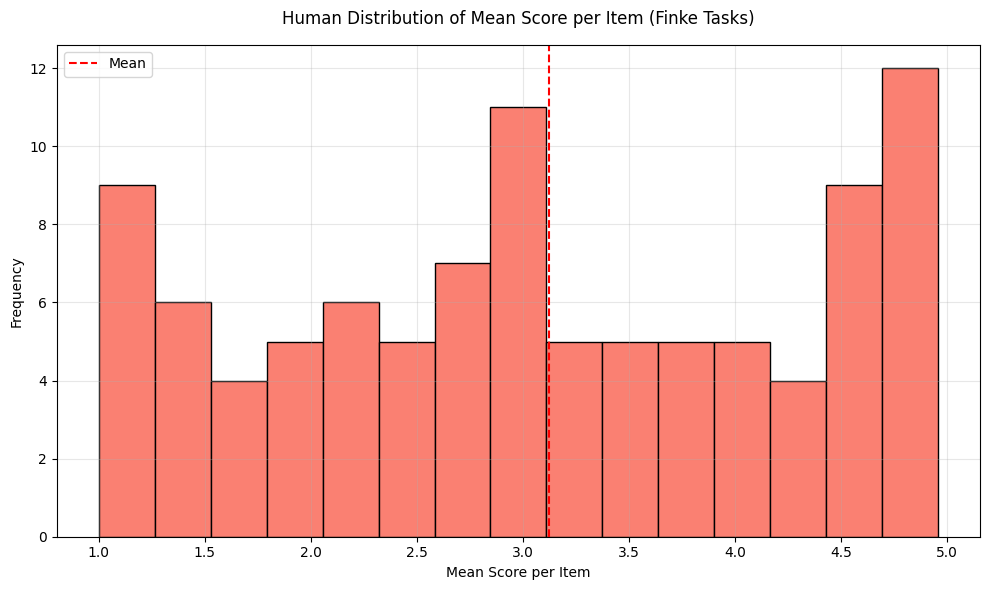

In [44]:
h_finke_mean = h_graded_results_finke["overall_score"].sum() / h_graded_results_finke["n_total"].sum()
print("Human Finke task set mean score per item:", h_finke_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(h_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(h_finke_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Human Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
h_graded_results_novel

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_6hazd14Iv0vRJV7,21.073810,24.147619,18.0,12,0,12,1.756151
1,R_5vQ6Xf1WugueDND,19.547619,19.095238,20.0,11,0,11,1.777056
2,R_5KpdGyLKCFDJS5r,23.321429,21.642857,25.0,12,0,12,1.943452
3,R_5hfsgpVmDBRxfr5,28.083333,26.166667,30.0,10,0,10,2.808333
4,R_6Eu2oR7CwVBRwyp,26.766667,25.533333,28.0,8,3,11,2.433333
...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,45.454762,42.909524,48.0,14,0,14,3.246769
96,R_1paSSMOwVWpJyn2,47.309524,41.619048,53.0,13,0,13,3.639194
97,R_7NhDTJ2fxewY5qh,35.600000,33.200000,38.0,14,0,14,2.542857
98,R_5RvyCf53JoQh7Eg,44.957143,43.914286,46.0,13,2,15,2.997143


Human novel task set mean score per item: 2.597963317766336


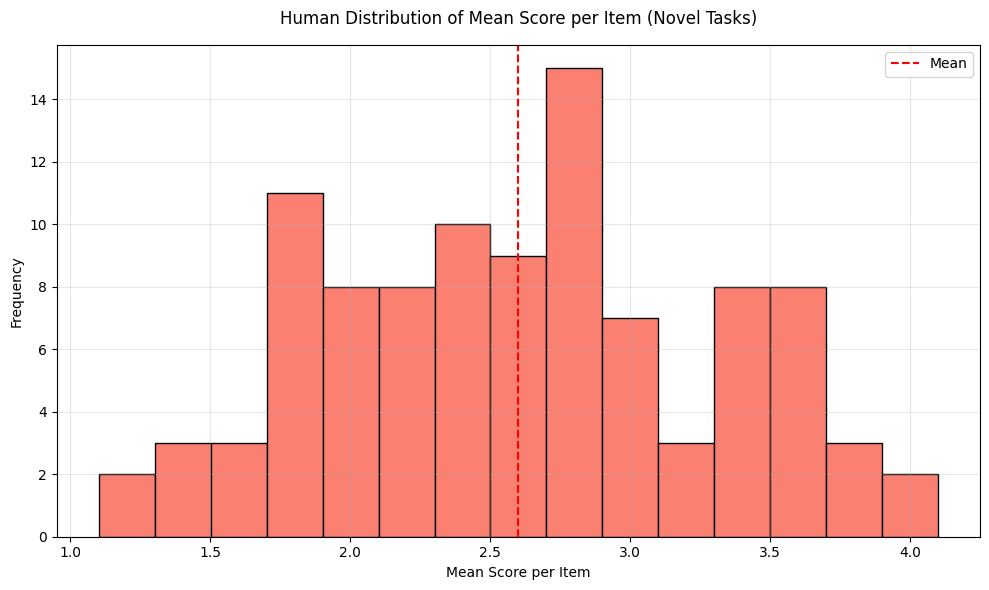

In [46]:
h_novel_mean = h_graded_results_novel["overall_score"].sum() / h_graded_results_novel["n_total"].sum()
print("Human novel task set mean score per item:", h_novel_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(h_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(h_novel_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Human Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
h_graded_results

,ResponseId,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,R_6hazd14Iv0vRJV7,25.323810,28.647619,22.0,15,0,15,1.688254
1,R_5vQ6Xf1WugueDND,30.130952,29.261905,31.0,14,1,15,2.008730
2,R_5KpdGyLKCFDJS5r,30.238095,28.476190,32.0,15,0,15,2.015873
3,R_5hfsgpVmDBRxfr5,45.000000,41.000000,49.0,15,0,15,3.000000
4,R_6Eu2oR7CwVBRwyp,38.516667,37.033333,40.0,11,4,15,2.567778
...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,47.788095,44.576190,51.0,15,0,15,3.185873
96,R_1paSSMOwVWpJyn2,52.642857,46.285714,59.0,15,0,15,3.509524
97,R_7NhDTJ2fxewY5qh,37.183333,34.366667,40.0,15,0,15,2.478889
98,R_5RvyCf53JoQh7Eg,44.957143,43.914286,46.0,13,2,15,2.997143


Human overall mean score per item: 2.7045838896306194


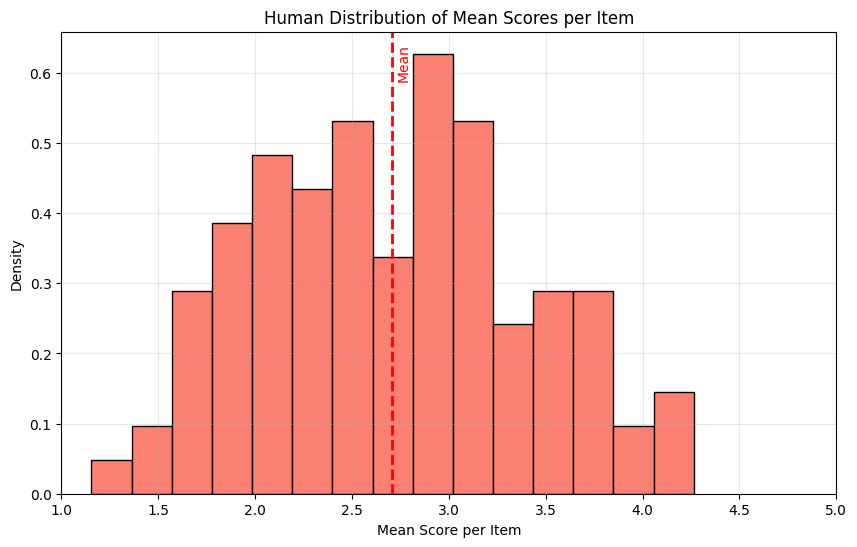

In [48]:
h_overall_mean = h_graded_results['overall_score'].sum() / h_graded_results['n_total'].sum()
print("Human overall mean score per item:", h_overall_mean)

plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['mean_score_per_item'], bins=15, color='salmon',
         edgecolor='black', density=True)
plt.axvline(h_overall_mean, color='red',
            linestyle='dashed', linewidth=2)
plt.text(h_overall_mean.mean() * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.title('Human Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

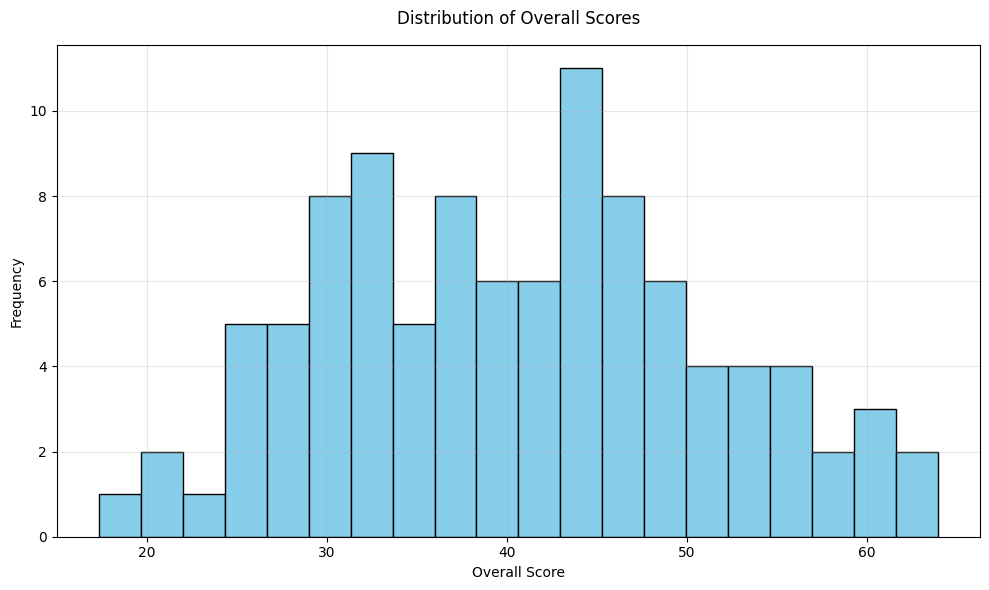

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Scores', pad=15, fontsize=12)
plt.xlabel('Overall Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

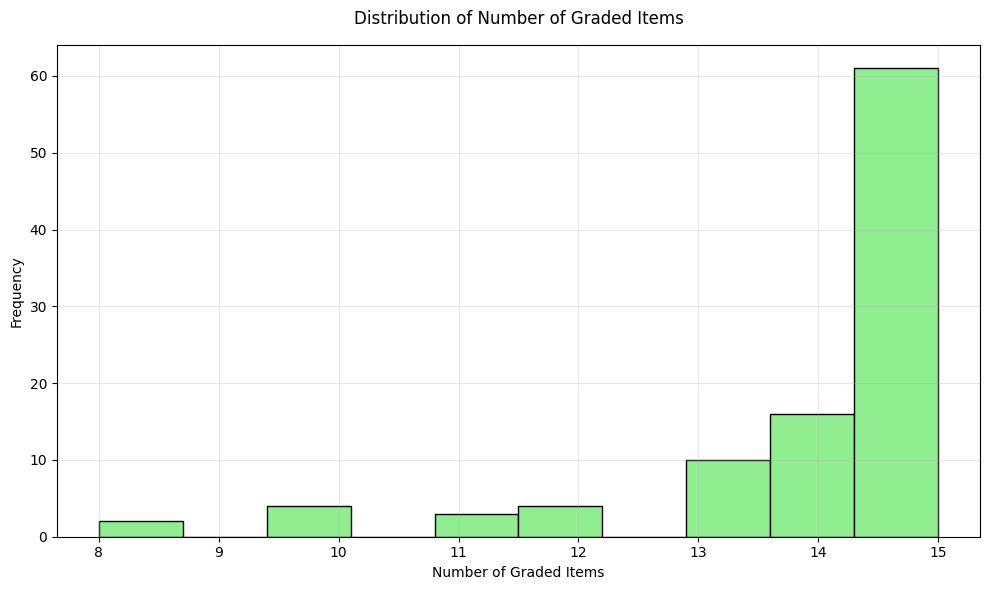

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(h_graded_results['n_graded'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Graded Items', pad=15, fontsize=12)
plt.xlabel('Number of Graded Items', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
h_full_results

,ResponseId,label,raw,block,canon,normal_mean,expert_mean,average_mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7,expert_1
0,R_6hazd14Iv0vRJV7,two squares,two squares,1,Ladder,2.166667,2.0,2.083333,2.0,3.0,3.0,1.0,3.0,1.0,NaN,2.0
1,R_6hazd14Iv0vRJV7,key,key,3,Glasses,1.166667,1.0,1.083333,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,R_6hazd14Iv0vRJV7,half circle,half circle,14,Computer Mouse,1.285714,1.0,1.142857,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
3,R_6hazd14Iv0vRJV7,house,house,15,House,3.666667,4.0,3.833333,3.0,5.0,4.0,3.0,3.0,4.0,NaN,4.0
4,R_6hazd14Iv0vRJV7,letter b,Letter B,21,Crystal ball - Person Outline,1.600000,1.0,1.300000,1.0,1.0,4.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,R_6YaCnTxmrtmyBmt,cup,cup,40,Mug,4.333333,5.0,4.666667,4.0,4.0,4.0,5.0,5.0,4.0,NaN,5.0
1402,R_6YaCnTxmrtmyBmt,gate,gate,41,Mug,1.666667,2.0,1.833333,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0
1403,R_6YaCnTxmrtmyBmt,present,present,42,Window - Grid,2.833333,3.0,2.916667,1.0,5.0,2.0,3.0,3.0,3.0,NaN,3.0
1404,R_6YaCnTxmrtmyBmt,lottery ball,lottery ball,45,Clock,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0


In [52]:
h_ungraded_results

,ResponseId,label,raw,block
0,R_5vQ6Xf1WugueDND,unsure,unsure,49
1,R_6Eu2oR7CwVBRwyp,rectangle with loop,rectangle with loop,40
2,R_6Eu2oR7CwVBRwyp,don't know,don't know,44
3,R_6Eu2oR7CwVBRwyp,don't know,don't know,47
4,R_6Eu2oR7CwVBRwyp,don't know,don't know,50
...,...,...,...,...
87,R_1HvLzzAFpuugjE9,no idea,no idea,45
88,R_1HvLzzAFpuugjE9,no idea,no idea,55
89,R_1PcY1LS2Mfhz64A,hd,HD,30
90,R_5RvyCf53JoQh7Eg,no idea,No idea,4


In [53]:
h_graded_results.to_csv("output_csvs/h_graded_results.csv")
h_full_results.to_csv("output_csvs/h_full_results.csv")
h_ungraded_results.to_csv("output_csvs/h_ungraded_results.csv")

h_graded_results_finke.to_csv("output_csvs/h_graded_results_finke.csv")
h_graded_results_novel.to_csv("output_csvs/h_graded_results_novel.csv")

In [54]:
llm_graded_results, llm_full_results, llm_ungraded_results = grade(llm_data, means_with_canon, "Model")
llm_graded_results_finke, _, _ = grade(llm_data, means_with_canon, "Model", FINKE_BLOCKS)
llm_graded_results_novel, _, _ = grade(llm_data, means_with_canon, "Model", NOVEL_BLOCKS)

In [55]:
llm_graded_results_finke

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Anthropic: Claude Opus 4.1 - Multiple Context ...,44.966667,42.933333,47.0,12,0,12,3.747222
1,Anthropic: Claude Sonnet 4 - Multiple Context ...,28.592857,26.185714,31.0,12,0,12,2.382738
2,Anthropic: Claude Sonnet 4 - Single Context - ...,27.809524,26.619048,29.0,12,0,12,2.317460
3,DeepMind: Gemini 2.0 Flash - Multiple Context ...,16.716667,17.433333,16.0,11,1,12,1.393056
4,DeepMind: Gemini 2.0 Flash - Single Context (2...,24.883333,22.766667,27.0,12,0,12,2.073611
5,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,19.038095,22.076190,16.0,7,5,12,1.586508
6,DeepMind: Gemini 2.5 Pro - Multiple Context - ...,33.625000,30.250000,37.0,12,0,12,2.802083
7,DeepMind: Gemini 2.5 Pro - Single Context - Dy...,29.250000,27.500000,31.0,12,0,12,2.437500
8,OpenAI: ChatGPT-4o - Multiple Context (2025-07...,26.883333,23.766667,30.0,12,0,12,2.240278
9,OpenAI: ChatGPT-4o - Single Context (2025-07-25),26.347619,24.695238,28.0,12,0,12,2.195635


LLM Finke task set mean score per item: 2.7061563051146384


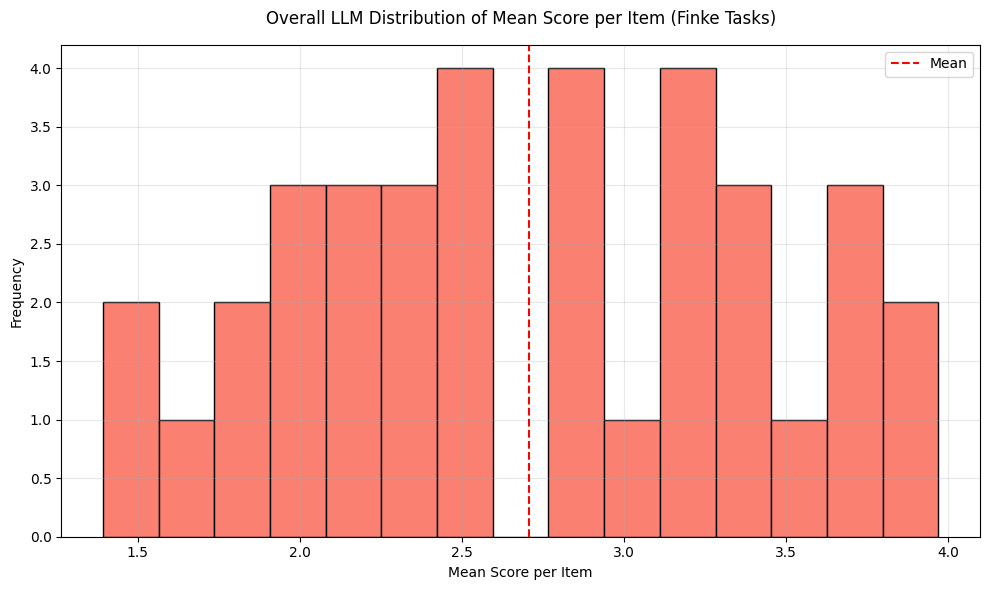

In [56]:
llm_finke_mean = llm_graded_results_finke["overall_score"].sum() / llm_graded_results_finke["n_total"].sum()
print("LLM Finke task set mean score per item:", llm_finke_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(llm_graded_results_finke['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(llm_finke_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Overall LLM Distribution of Mean Score per Item (Finke Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [57]:
llm_graded_results_novel

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Anthropic: Claude Opus 4.1 - Multiple Context ...,118.852381,103.704762,134.0,48,0,48,2.476091
1,Anthropic: Claude Sonnet 4 - Multiple Context ...,96.254762,90.509524,102.0,48,0,48,2.005308
2,Anthropic: Claude Sonnet 4 - Single Context - ...,105.733333,94.466667,117.0,48,0,48,2.202778
3,DeepMind: Gemini 2.0 Flash - Multiple Context ...,95.576190,89.152381,102.0,48,0,48,1.991171
4,DeepMind: Gemini 2.0 Flash - Single Context (2...,93.805952,85.611905,102.0,48,0,48,1.954291
5,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,77.807143,75.614286,80.0,31,17,48,1.620982
6,DeepMind: Gemini 2.5 Pro - Multiple Context - ...,106.517857,101.035714,112.0,48,0,48,2.219122
7,DeepMind: Gemini 2.5 Pro - Single Context - Dy...,113.430952,103.861905,123.0,48,0,48,2.363145
8,OpenAI: ChatGPT-4o - Multiple Context (2025-07...,108.465476,97.930952,119.0,48,0,48,2.259697
9,OpenAI: ChatGPT-4o - Single Context (2025-07-25),98.302381,89.604762,107.0,48,0,48,2.047966


LLM novel task set mean score per item: 2.5540702160493827


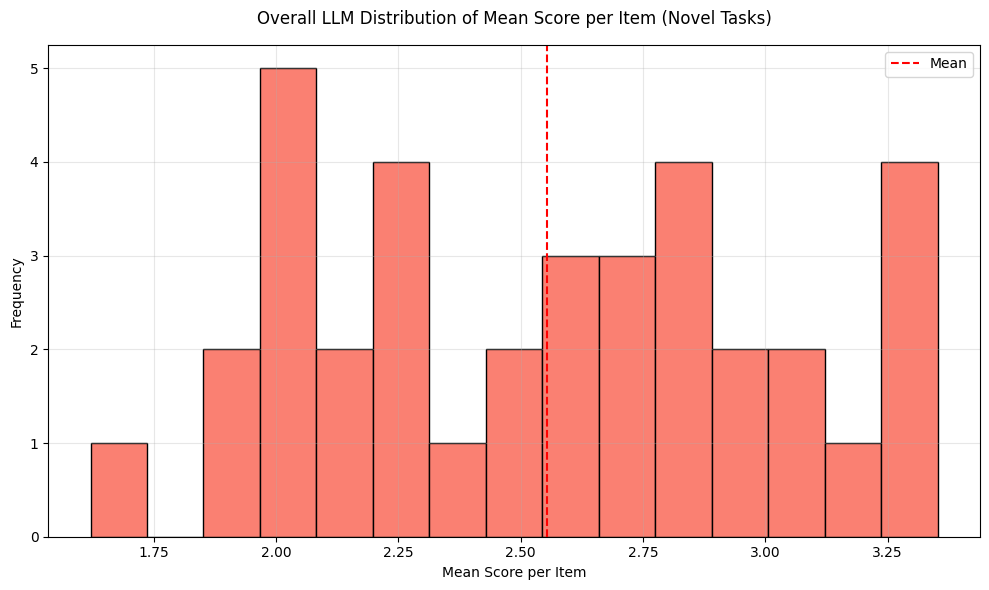

In [58]:
llm_novel_mean = llm_graded_results_novel["overall_score"].sum() / llm_graded_results_novel["n_total"].sum()
print("LLM novel task set mean score per item:", llm_novel_mean)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(llm_graded_results_novel['mean_score_per_item'], bins=15,
        color='salmon', edgecolor='black')
ax.axvline(llm_novel_mean,
           color='red', linestyle='--', label='Mean')
ax.set_title('Overall LLM Distribution of Mean Score per Item (Novel Tasks)', pad=15, fontsize=12)
ax.set_xlabel('Mean Score per Item', fontsize=10)
ax.set_ylabel('Frequency', fontsize=10)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
llm_graded_results

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
0,Anthropic: Claude Opus 4.1 - Multiple Context ...,163.819048,146.638095,181.0,60,0,60,2.730317
1,Anthropic: Claude Sonnet 4 - Multiple Context ...,124.847619,116.695238,133.0,60,0,60,2.080794
2,Anthropic: Claude Sonnet 4 - Single Context - ...,133.542857,121.085714,146.0,60,0,60,2.225714
3,DeepMind: Gemini 2.0 Flash - Multiple Context ...,112.292857,106.585714,118.0,59,1,60,1.871548
4,DeepMind: Gemini 2.0 Flash - Single Context (2...,118.689286,108.378571,129.0,60,0,60,1.978155
5,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,96.845238,97.690476,96.0,38,22,60,1.614087
6,DeepMind: Gemini 2.5 Pro - Multiple Context - ...,140.142857,131.285714,149.0,60,0,60,2.335714
7,DeepMind: Gemini 2.5 Pro - Single Context - Dy...,142.680952,131.361905,154.0,60,0,60,2.378016
8,OpenAI: ChatGPT-4o - Multiple Context (2025-07...,135.348810,121.697619,149.0,60,0,60,2.255813
9,OpenAI: ChatGPT-4o - Single Context (2025-07-25),124.650000,114.300000,135.0,60,0,60,2.077500


In [60]:
o3_model_map = {
    "o3_default": ["OpenAI: o3 - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 - Multiple Context - High Reasoning (2025-09-15)", "OpenAI: o3 - Single Context - High Reasoning (2025-07-21)"],
    "o3_pro": ["OpenAI: o3 Pro - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 Pro - Single Context - High Reasoning (2025-07-21)", "OpenAI: o3 Pro - Multiple Context - High Reasoning (2025-09-16)"],
    "o3_images": ["OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-22)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-23)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-24)"]
}
gpt5_model_map = {
    "gpt5": ["OpenAI: GPT 5 - Multiple Context - High Reasoning (2025-09-11)", "OpenAI: GPT 5 - Multiple Context - High Reasoning (2025-09-15)"]
}
anthropic_model_map = {
    "opus": ["Anthropic: Claude Opus 4.1 - Multiple Context - Extended Thinking 9000t (2025-09-11)"],
    "sonnet": ["Anthropic: Claude Sonnet 4 - Multiple Context - Extended Thinking 4000t (2025-09-11)", "Anthropic: Claude Sonnet 4 - Single Context - Extended Thinking 4000t (2025-09-11)"]
}
deepmind_model_map = {
    "gemini_2.0_flash": ["DeepMind: Gemini 2.0 Flash - Multiple Context (2025-07-21)", "DeepMind: Gemini 2.0 Flash - Single Context (2025-07-21)"],
    "gemini_2.0_flash_images": ["DeepMind: Gemini 2.0 Flash w/ Images - Multiple Context (2025-07-25)"],
    "gemini_2.5_pro": ["DeepMind: Gemini 2.5 Pro - Multiple Context (2025-07-21)", "DeepMind: Gemini 2.5 Pro - Single Context - Dynamic Thinking (2025-07-21)"],
}
openai_reasoning_comparison_model_map = {
    "o3_pro": ["OpenAI: o3 Pro - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 Pro - Single Context - High Reasoning (2025-07-21)", "OpenAI: o3-Pro - Multiple Context - High Reasoning (2025-09-16)"],
    "o3_high": ["OpenAI: o3 - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 - Multiple Context - High Reasoning (2025-09-15)", "OpenAI: o3 - Single Context - High Reasoning (2025-07-21)"],
    "o3_images_high": ["OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-22)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-23)", "OpenAI: o3 w/ GPT-image-1 - Multiple Context - High Reasoning (2025-07-24)"],
    "o3_med": ["OpenAI: o3 - Multiple Context - Medium Reasoning (2025-09-12)"],
    "o3_images_med": ["OpenAI: o3 w/ GPT-image-1 - Multiple Context - Med Reasoning (2025-07-14)"],
    "o3_low": ["OpenAI: o3 - Multiple Context - Low Reasoning (2025-09-12)"],
    "gpt5_high": ["OpenAI: GPT 5 - Multiple Context - High Reasoning (2025-09-11)", "OpenAI: GPT 5 - Multiple Context - High Reasoning (2025-09-15)"],
    "gpt5_med": ["OpenAI: GPT 5 - Multiple Context - Medium Reasoning (2025-09-16)"],
    "gpt5_low": ["OpenAI: GPT 5 - Multiple Context - Low Reasoning (2025-09-15)"],
    "gpt5_minimal": ["OpenAI: GPT 5 - Multiple Context - Minimal Reasoning (2025-09-16)"],
    "o4mini_high": ["OpenAI: o4-mini - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o4-mini - Single Context - High Reasoning (2025-07-21)"],
    "o4mini_med": ["OpenAI: o4-mini - Multiple Context - Medium Reasoning (2025-07-14)", "OpenAI: o4-mini - Single Context - Medium Reasoning (2025-07-14)"]
}
other_openai_model_map = {
    "chatgpt-4o": ["OpenAI: ChatGPT-4o - Multiple Context (2025-07-25)", "OpenAI: ChatGPT-4o - Single Context (2025-07-25)"],
    "gpt4.1": ["OpenAI: GPT 4.1 - Multiple Context (2025-07-21)", "OpenAI: GPT 4.1 - Single Context (2025-07-21)"],
    "gpt4.1_images": ["OpenAI: GPT 4.1 w/ GPT-image-1 - Multiple Context (2025-07-21)", "OpenAI: GPT 4.1 w/ GPT-Image-1 - Single Context (2025-07-21)"],
    "o4mini_high": ["OpenAI: o4-mini - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o4-mini - Single Context - High Reasoning (2025-07-21)"],
    "o4mini_med": ["OpenAI: o4-mini - Multiple Context - Medium Reasoning (2025-07-14)", "OpenAI: o4-mini - Single Context - Medium Reasoning (2025-07-14)"]
}
single_vs_multiple_context_model_map = {
    "sonnet_sc": ["Anthropic: Claude Sonnet 4 - Single Context - Extended Thinking 4000t (2025-09-11)"],
    "sonnet_mc": ["Anthropic: Claude Sonnet 4 - Multiple Context - Extended Thinking 4000t (2025-09-11)"],
    "gemini_2.0_flash_sc": ["DeepMind: Gemini 2.0 Flash - Single Context (2025-07-21)"],
    "gemini_2.0_flash_mc": ["DeepMind: Gemini 2.0 Flash - Multiple Context (2025-07-21)"],
    "gemini_2.5_pro_sc": ["DeepMind: Gemini 2.5 Pro - Single Context - Dynamic Thinking (2025-07-21)"],
    "gemini_2.5_pro_mc": ["DeepMind: Gemini 2.5 Pro - Multiple Context - Dynamic Thinking (2025-07-21)"],
    "chatgpt4o_sc": ["OpenAI: ChatGPT-4o - Single Context (2025-07-25)"],
    "chatgpt4o_mc": ["OpenAI: ChatGPT-4o - Multiple Context (2025-07-25)"],
    "gpt4.1_sc": ["OpenAI: GPT 4.1 - Single Context (2025-07-21)"],
    "gpt4.1_mc": ["OpenAI: GPT 4.1 - Multiple Context (2025-07-21)"],
    "gpt4.1_images_sc": ["OpenAI: GPT 4.1 w/ GPT-Image-1 - Single Context (2025-07-21)"],
    "gpt4.1_images_mc": ["OpenAI: GPT 4.1 w/ GPT-image-1 - Multiple Context (2025-07-21)"],
    "o3_sc": ["OpenAI: o3 - Single Context - High Reasoning (2025-07-21)"],
    "o3_mc": ["OpenAI: o3 - Multiple Context - High Reasoning (2025-09-15)", "OpenAI: o3 - Multiple Context - High Reasoning (2025-07-21)"],
    "o3_pro_sc": ["OpenAI: o3 Pro - Single Context - High Reasoning (2025-07-21)"],
    "o3_pro_mc": ["OpenAI: o3 Pro - Multiple Context - High Reasoning (2025-07-21)", "OpenAI: o3 Pro - Multiple Context - High Reasoning (2025-09-16)"],
    "o4_mini_sc": ["OpenAI: o4-mini - Single Context - High Reasoning (2025-07-21)"],
    "o4_mini_mc": ["OpenAI: o4-mini - Multiple Context - High Reasoning (2025-07-21)"],
    "o4_mini_med_sc": ["OpenAI: o4-mini - Single Context - Medium Reasoning (2025-07-14)"],
    "o4_mini_med_mc": ["OpenAI: o4-mini - Multiple Context - Medium Reasoning (2025-07-14)"]
}

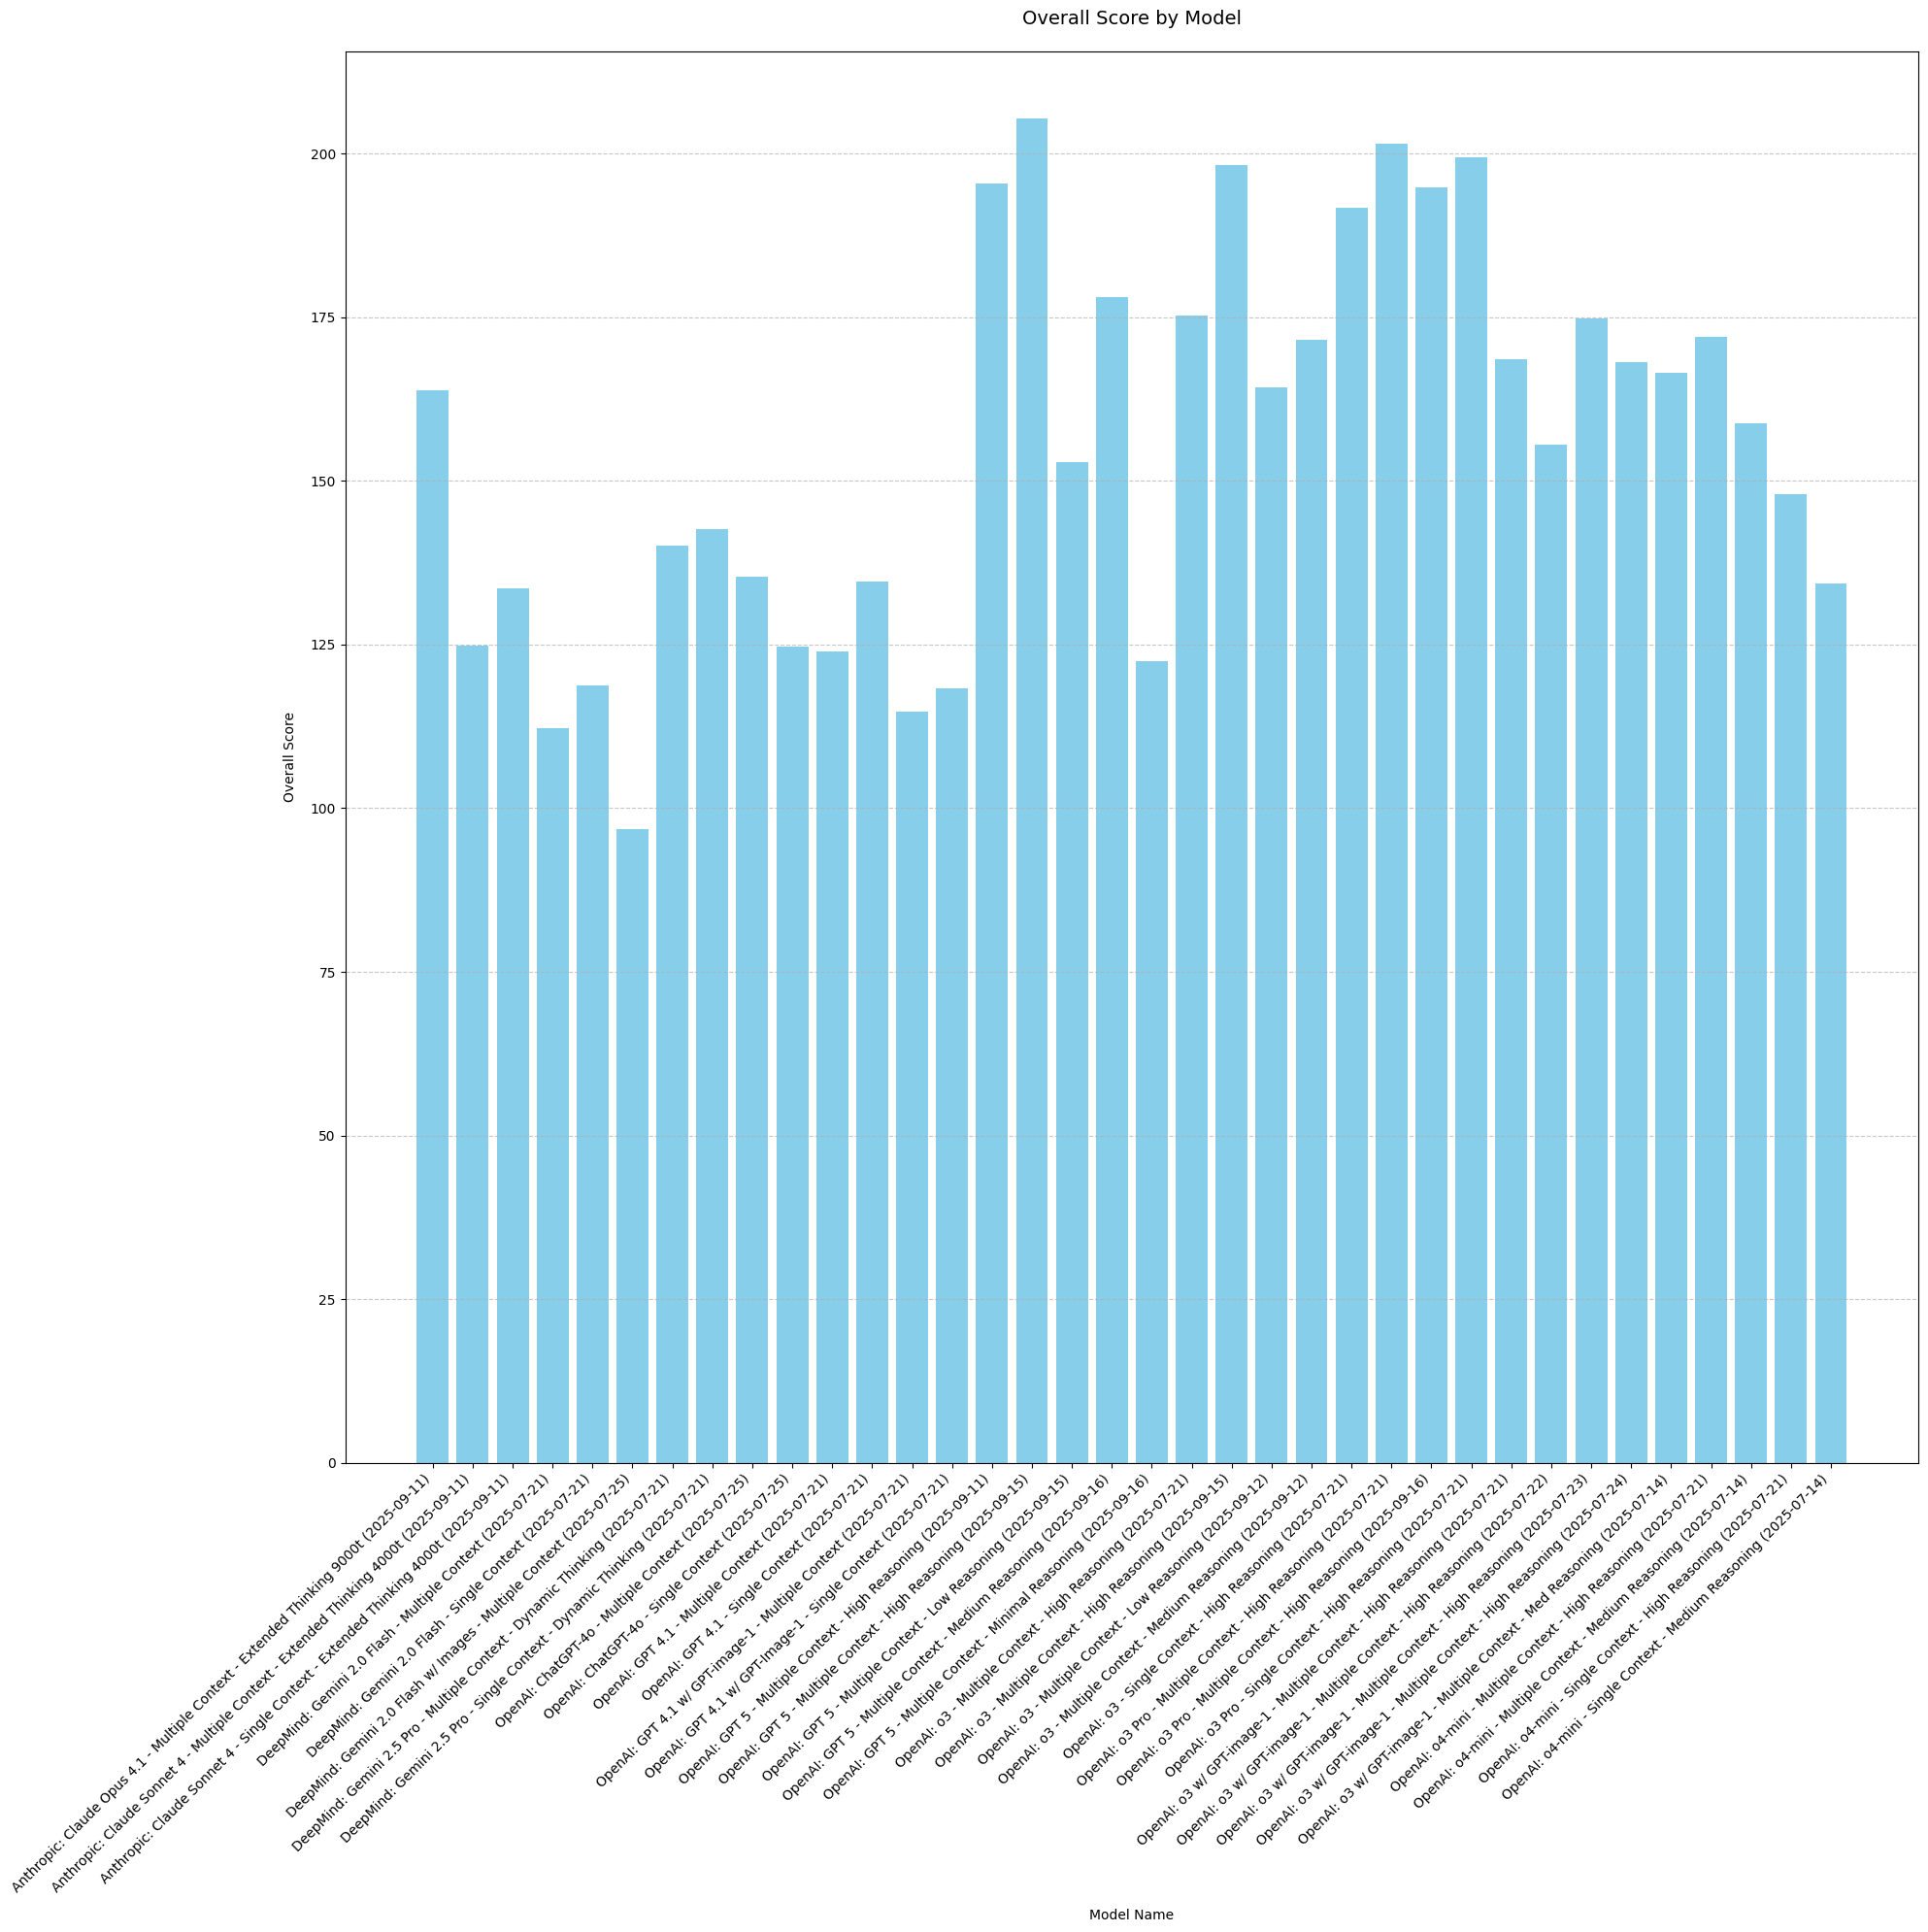

In [61]:
plt.figure(figsize=(20, 20))
plt.bar(range(len(llm_graded_results['Model'])), llm_graded_results['overall_score'], color='skyblue')
plt.xticks(range(len(llm_graded_results['Model'])), llm_graded_results['Model'], rotation=45, ha='right')
plt.title('Overall Score by Model', pad=20, size=14)
plt.xlabel('Model Name', labelpad=10)
plt.ylabel('Overall Score', labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

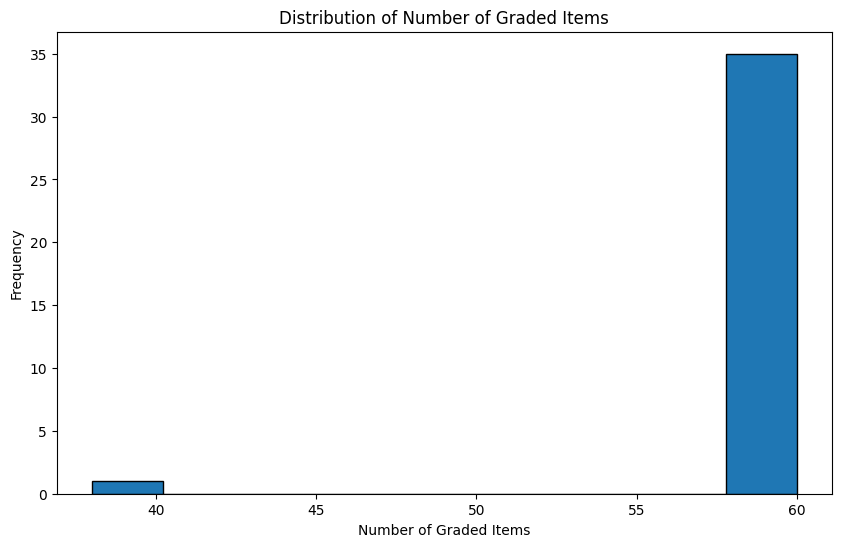

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(llm_graded_results['n_graded'], bins=10, edgecolor='black')
plt.title('Distribution of Number of Graded Items')
plt.xlabel('Number of Graded Items')
plt.ylabel('Frequency')
plt.show()

LLM overall mean score per item: 2.5844874338624337


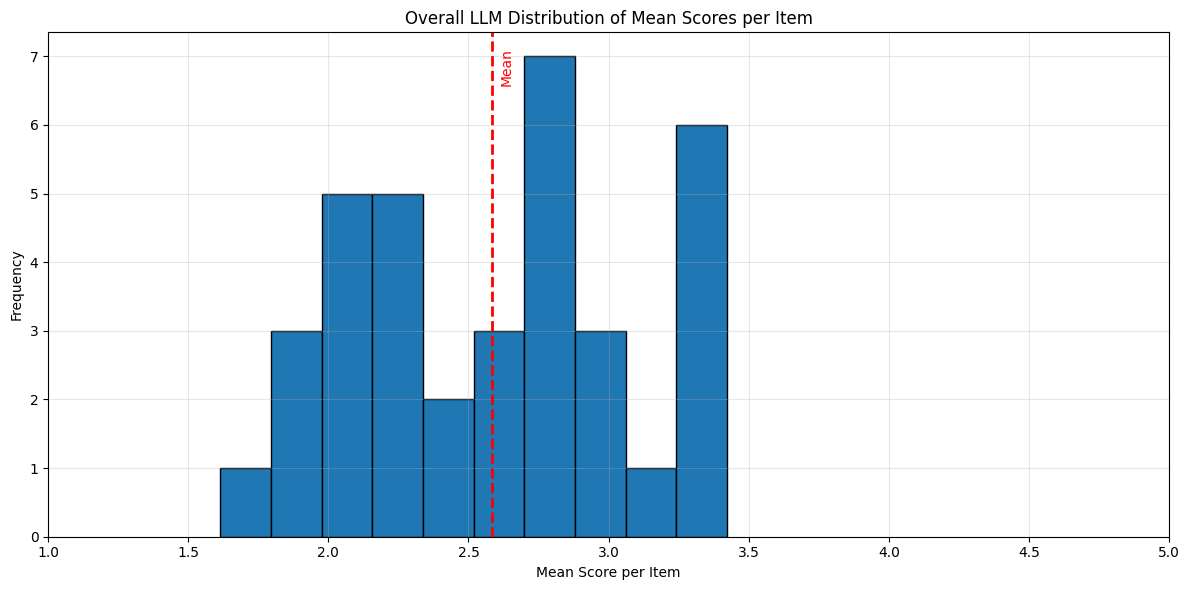

In [63]:
llm_overall_mean = llm_graded_results['overall_score'].sum() / llm_graded_results['n_total'].sum()
print("LLM overall mean score per item:", llm_overall_mean)

plt.figure(figsize=(12, 6))
plt.hist(llm_graded_results['mean_score_per_item'], bins=10, edgecolor='black')
plt.title('Overall LLM Distribution of Mean Scores per Item')
plt.xlabel('Mean Score per Item')
plt.xlim((1, 5))
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.axvline(llm_overall_mean,
            color='red', linestyle='dashed', linewidth=2)
plt.text(llm_overall_mean * 1.01,
         plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
plt.tight_layout()
plt.show()

In [64]:
llm_full_results

,Model,label,raw,block,canon,normal_mean,expert_mean,average_mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7,expert_1
0,Anthropic: Claude Opus 4.1 - Multiple Context ...,ladder,Ladder,1,Ladder,5.000000,5.0,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0
1,Anthropic: Claude Opus 4.1 - Multiple Context ...,ladder,Ladder,2,Ladder,4.500000,5.0,4.750000,5.0,4.0,4.0,5.0,4.0,5.0,NaN,5.0
2,Anthropic: Claude Opus 4.1 - Multiple Context ...,bunny ears,Bunny ears,3,Glasses,1.400000,2.0,1.700000,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
3,Anthropic: Claude Opus 4.1 - Multiple Context ...,eyeglasses,Eyeglasses,4,Glasses,3.000000,4.0,3.500000,1.0,5.0,4.0,3.0,2.0,2.0,4.0,4.0
4,Anthropic: Claude Opus 4.1 - Multiple Context ...,butterfly wings,Butterfly wings,5,Glasses,1.000000,2.0,1.500000,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,OpenAI: o4-mini - Single Context - Medium Reas...,shovel,Shovel,55,Yield Sign - Martini Glass,1.800000,4.0,2.900000,1.0,1.0,1.0,4.0,2.0,NaN,NaN,4.0
2129,OpenAI: o4-mini - Single Context - Medium Reas...,tobacco pipe,Tobacco pipe,56,Clock,1.400000,1.0,1.200000,1.0,3.0,1.0,1.0,1.0,NaN,NaN,1.0
2130,OpenAI: o4-mini - Single Context - Medium Reas...,truss bridge,Truss bridge,57,Hourglass,1.666667,2.0,1.833333,4.0,1.0,2.0,1.0,1.0,1.0,NaN,2.0
2131,OpenAI: o4-mini - Single Context - Medium Reas...,umbrella,Umbrella,58,Umbrella,4.833333,5.0,4.916667,5.0,5.0,5.0,4.0,5.0,5.0,NaN,5.0


In [65]:
llm_ungraded_results

,Model,label,raw,block
0,DeepMind: Gemini 2.0 Flash - Multiple Context ...,partial logo.,Partial logo.,56
1,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stacked letters,Stacked letters,1
2,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stacked letters,Stacked letters,4
3,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stylized letter,Stylized letter,12
4,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stylized initials,Stylized initials,14
5,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,abstract logo.,Abstract logo.,19
6,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stylized letter.,Stylized letter.,22
7,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,rotated letter.,Rotated letter.,25
8,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stylized letter,Stylized letter,26
9,DeepMind: Gemini 2.0 Flash w/ Images - Multipl...,stacked letters,Stacked letters,29


In [66]:
llm_graded_results.to_csv("output_csvs/llm_graded_results.csv")
llm_full_results.to_csv("output_csvs/llm_full_results.csv")
llm_ungraded_results.to_csv("output_csvs/llm_ungraded_results.csv")

llm_graded_results_finke.to_csv("output_csvs/llm_graded_results_finke.csv")
llm_graded_results_novel.to_csv("output_csvs/llm_graded_results_novel.csv")

In [67]:
def convert_model_map_to_aggregate_results(llm_results, model_map):
    categories = ['overall_score', 'normal_score', 'expert_score', 'n_graded', 'n_ungraded', 'n_total']
    model_dfs = []
    for key in model_map.keys():
        model_dfs.append(pd.concat([llm_results.loc[llm_results['Model'] == model] for model in model_map[key]]))

    final_dict = {category: [df[category].sum() for df in model_dfs] for category in categories}

    final_dict['Model'] = list(model_map.keys())
    final_df = pd.DataFrame(final_dict)
    final_df.set_index('Model', inplace=True)
    final_df['mean_score_per_item'] = final_df['overall_score'] / final_df['n_total']

    return final_df, model_dfs


In [68]:
o3_graded_results, o3_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, o3_model_map)
o3_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
o3_default,565.395238,515.790476,615.0,180,0,180,3.141085
o3_pro,595.842857,532.685714,659.0,180,0,180,3.310238
o3_images,666.932143,604.864286,729.0,240,0,240,2.778884


In [69]:
o3_default, o3_pro, o3_images = o3_sub_dfs

In [70]:
o3_default

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
19,OpenAI: o3 - Multiple Context - High Reasoning...,175.284524,164.569048,186.0,60,0,60,2.921409
20,OpenAI: o3 - Multiple Context - High Reasoning...,198.330952,176.661905,220.0,60,0,60,3.305516
23,OpenAI: o3 - Single Context - High Reasoning (...,191.779762,174.559524,209.0,60,0,60,3.196329


In [71]:
o3_images

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
27,OpenAI: o3 w/ GPT-image-1 - Multiple Context -...,168.533333,150.066667,187.0,60,0,60,2.808889
28,OpenAI: o3 w/ GPT-image-1 - Multiple Context -...,155.486905,135.973810,175.0,60,0,60,2.591448
29,OpenAI: o3 w/ GPT-image-1 - Multiple Context -...,174.826190,159.652381,190.0,60,0,60,2.913770
30,OpenAI: o3 w/ GPT-image-1 - Multiple Context -...,168.085714,159.171429,177.0,60,0,60,2.801429


In [72]:
o3_pro

,Model,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
24,OpenAI: o3 Pro - Multiple Context - High Reaso...,201.509524,182.019048,221.0,60,0,60,3.358492
26,OpenAI: o3 Pro - Single Context - High Reasoni...,199.480952,179.961905,219.0,60,0,60,3.324683
25,OpenAI: o3 Pro - Multiple Context - High Reaso...,194.852381,170.704762,219.0,60,0,60,3.247540


In [73]:
gpt5_graded_results, gpt5_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, gpt5_model_map)
anthropic_graded_results, anthropic_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, anthropic_model_map)
deepmind_graded_results, deepmind_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, deepmind_model_map)
other_openai_graded_results, other_openai_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, other_openai_model_map)

In [74]:
gpt5_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
gpt5,400.822619,365.645238,436.0,120,0,120,3.340188


In [75]:
anthropic_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
opus,163.819048,146.638095,181.0,60,0,60,2.730317
sonnet,258.390476,237.780952,279.0,120,0,120,2.153254


In [76]:
deepmind_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
gemini_2.0_flash,230.982143,214.964286,247.0,119,1,120,1.924851
gemini_2.0_flash_images,96.845238,97.690476,96.0,38,22,60,1.614087
gemini_2.5_pro,142.680952,131.361905,154.0,60,0,60,2.378016


In [77]:
other_openai_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
chatgpt-4o,259.998810,235.997619,284.0,120,0,120,2.166657
gpt4.1,258.611905,232.223810,285.0,120,0,120,2.155099
gpt4.1_images,233.077381,215.154762,251.0,118,2,120,1.942312
o4mini_high,319.880952,297.761905,342.0,119,1,120,2.665675
o4mini_med,293.205952,275.411905,311.0,120,0,120,2.443383


In [78]:
openai_reasoning_comparison_results, openai_reasoning_comparison_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, openai_reasoning_comparison_model_map)
openai_reasoning_comparison_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
o3_pro,400.990476,361.980952,440.0,120,0,120,3.341587
o3_high,565.395238,515.790476,615.0,180,0,180,3.141085
o3_images_high,666.932143,604.864286,729.0,240,0,240,2.778884
o3_med,171.510714,153.021429,190.0,60,0,60,2.858512
o3_images_med,166.551190,149.102381,184.0,59,1,60,2.775853
o3_low,164.295238,143.590476,185.0,60,0,60,2.738254
gpt5_high,400.822619,365.645238,436.0,120,0,120,3.340188
gpt5_med,178.150000,154.300000,202.0,60,0,60,2.969167
gpt5_low,152.902381,135.804762,170.0,60,0,60,2.548373


In [79]:
single_vs_multiple_context_graded_results, single_vs_multiple_context_sub_dfs = convert_model_map_to_aggregate_results(llm_graded_results, single_vs_multiple_context_model_map)
single_vs_multiple_context_graded_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
sonnet_sc,133.542857,121.085714,146.0,60,0,60,2.225714
sonnet_mc,124.847619,116.695238,133.0,60,0,60,2.080794
gemini_2.0_flash_sc,118.689286,108.378571,129.0,60,0,60,1.978155
gemini_2.0_flash_mc,112.292857,106.585714,118.0,59,1,60,1.871548
gemini_2.5_pro_sc,142.680952,131.361905,154.0,60,0,60,2.378016
gemini_2.5_pro_mc,140.142857,131.285714,149.0,60,0,60,2.335714
chatgpt4o_sc,124.650000,114.300000,135.0,60,0,60,2.077500
chatgpt4o_mc,135.348810,121.697619,149.0,60,0,60,2.255813
gpt4.1_sc,134.667857,124.335714,145.0,60,0,60,2.244464


In [80]:
llm_aggregate_results = pd.concat([o3_graded_results, gpt5_graded_results, anthropic_graded_results, deepmind_graded_results, other_openai_graded_results], axis=0)
llm_aggregate_results

,overall_score,normal_score,expert_score,n_graded,n_ungraded,n_total,mean_score_per_item
Model,,,,,,,
o3_default,565.395238,515.790476,615.0,180,0,180,3.141085
o3_pro,595.842857,532.685714,659.0,180,0,180,3.310238
o3_images,666.932143,604.864286,729.0,240,0,240,2.778884
gpt5,400.822619,365.645238,436.0,120,0,120,3.340188
opus,163.819048,146.638095,181.0,60,0,60,2.730317
sonnet,258.390476,237.780952,279.0,120,0,120,2.153254
gemini_2.0_flash,230.982143,214.964286,247.0,119,1,120,1.924851
gemini_2.0_flash_images,96.845238,97.690476,96.0,38,22,60,1.614087
gemini_2.5_pro,142.680952,131.361905,154.0,60,0,60,2.378016


In [81]:
llm_aggregate_results.to_csv("output_csvs/llm_aggregate_results.csv")
openai_reasoning_comparison_results.to_csv("output_csvs/openai_reasoning_comparison_results.csv")
single_vs_multiple_context_graded_results.to_csv("output_csvs/single_vs_multiple_context_results.csv")

In [82]:
llm_aggregate_mean = llm_aggregate_results['overall_score'].sum() / llm_aggregate_results['n_total'].sum()
print("LLM aggregate mean:", llm_aggregate_mean)

LLM aggregate mean: 2.578440065681445


In [83]:
# o3_overall_mean = o3_graded_results['overall_score'].sum() / o3_graded_results['n_total'].sum()
# o3_no_images = pd.concat([o3_default, o3_pro])
# o3_mean_no_images = o3_no_images['overall_score'].sum() / o3_no_images['n_total'].sum()
# print("o3 overall mean score per item:", o3_overall_mean)
# print("o3 overall mean score per item (no images):", o3_mean_no_images)
#
# plt.figure(figsize=(12, 6))
# plt.hist(o3_graded_results['mean_score_per_item'], edgecolor='black')
# plt.title('Distribution of o3 Mean Scores per Item')
# plt.xlabel('Mean Score per Item')
# plt.xlim((1, 5))
# plt.ylabel('Frequency')
# plt.grid(True, alpha=0.3)
# plt.axvline(o3_overall_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(o3_overall_mean * 1.01,
#          plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
# plt.axvline(o3_mean_no_images,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(o3_mean_no_images * 1.01,
#          plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
# plt.axvline(h_overall_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(h_overall_mean * 1.01,
#          plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
# plt.axvline(llm_aggregate_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(llm_aggregate_mean * 1.01,
#          plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
# # plt.axvline(everyone_else_overall_mean,
# #             color='red', linestyle='dashed', linewidth=2)
# # plt.text(everyone_else_overall_mean * 1.01,
# #          plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
# plt.tight_layout()
# plt.show()

In [84]:
# plt.figure(figsize=(12, 6))
# plt.hist(o3_graded_results['mean_score_per_item'], edgecolor='black')
# plt.title('Distribution of o3 Mean Scores per Item (Zoomed)')
# plt.xlabel('Mean Score per Item')
# plt.ylabel('Frequency')
# plt.grid(True, alpha=0.3)
# plt.axvline(o3_overall_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(o3_overall_mean * 1.01,
#          plt.ylim()[1] * 0.9, 'Mean', rotation=90, color='red')
# plt.axvline(o3_mean_no_images,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(o3_mean_no_images * 1.01,
#          plt.ylim()[1] * 0.75, 'Mean (no images)', rotation=90, color='red')
# plt.axvline(h_overall_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(h_overall_mean * 1.01,
#          plt.ylim()[1] * 0.8, 'Human Mean', rotation=90, color='red')
# plt.axvline(llm_overall_mean,
#             color='red', linestyle='dashed', linewidth=2)
# plt.text(llm_overall_mean * 1.01,
#          plt.ylim()[1] * 0.75, 'Overall LLM Mean', rotation=90, color='red')
# # plt.axvline(everyone_else_overall_mean,
# #             color='red', linestyle='dashed', linewidth=2)
# # plt.text(everyone_else_overall_mean * 1.01,
# #          plt.ylim()[1] * 0.75, 'Non-o3 LLM Mean', rotation=90, color='red')
# plt.tight_layout()
# plt.show()

### 4) Estimate Difficulty of Each Instruction Set

In [85]:
instructions_meta_data = pd.read_csv("input_csvs/meta_instruction_data.csv")
instructions_meta_data

,Ins 1,Ins 2,Ins 3,Ins 4,Canon,Num Ins,Num Obj
0,"<X> a capital letter ""H"".","<X> an identical capital letter ""H"" directly b...","<X> a third identical ""H"" just below the exist...",NaN,Ladder,3,3
1,"<X> a capital letter ""I"" consisting of three l...","<X> an identical capital letter ""I"" directly t...","<X> a third identical ""I"" just to the right of...",<X> the entire scene rotated 90 degrees to the...,Ladder,4,3
2,"<X> two lowercase letter ""p"" next to each other.",<X> the right figure mirrored so that it point...,<X> the figure on the left moved to the right ...,<X> the entire scene upside down.,Glasses,4,2
3,"<X> two lowercase letter ""b"" next to each other.",<X> the right figure mirrored so that it point...,<X> the figure on the left moved to the right ...,NaN,Glasses,3,2
4,"<X> a lowercase letter ""b"" to the left of a lo...",<X> the figure on the left moved to the right ...,NaN,NaN,Glasses,2,2
5,"<X> the number ""8"" with two equally sized loops.",<X> the figure rotated 90 degrees to the right.,"<X> two short lines coming up, vertically, fro...",NaN,Glasses,3,3
6,"<X> two capital letter ""V"", one above the othe...",<X> the entire scene upside down.,<X> a line running from the top of the top fig...,NaN,Pine Tree,3,3
7,"<X> two capital letter ""B"" next to each other.",<X> the left figure mirrored so that it points...,"<X> a capital letter ""Y"" in-between the two fi...",<X> all three figures aligned such that the th...,Butterfly,4,3
8,"<X> two capital letter ""B"" next to each other.",<X> the left figure mirrored so that it points...,<X> the two figures aligned such that the two ...,"<X> a lowercase letter ""v"" affixed to the midd...",Butterfly,4,3
9,"<X> a capital letter ""E"" with all straight lines.",<X> the figure rotated 90 degrees to the left.,"<X> a capital letter ""I"", consisting of three ...",<X> the bottom horizontal line of the figure r...,"Comb, Pitchfork",4,2


In [86]:
def numeric_identifier_to_string(n: int):
    if n >= 100:
        return f"{n}"
    elif n < 10:
        return f"00{n}"
    else:
        return f"0{n}"

In [87]:
human_difficulty_data = pd.read_csv("input_csvs/human_phantasia_difficulty_ranking_data.csv")
human_difficulty_data

,ResponseId,001 - Rating_1,001 - Rating_2,002 - Rating_1,002 - Rating_2,003 - Rating_1,003 - Rating_2,004 - Rating_1,004 - Rating_2,005 - Rating_1,...,056 - Rating_1,056 - Rating_2,057 - Rating_1,057 - Rating_2,058 - Rating_1,058 - Rating_2,059 - Rating_1,059 - Rating_2,060 - Rating_1,060 - Rating_2
0,R_3Wu3EGpCFW6Qbuk,NaN,NaN,NaN,NaN,Somewhat agree,Somewhat disagree,NaN,NaN,NaN,...,NaN,NaN,Strongly agree,Strongly disagree,NaN,NaN,Strongly agree,Strongly disagree,NaN,NaN
1,R_7Kuxq2JKf3BOKPH,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R_1NxJpYzFJggITGm,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN,Strongly agree,...,Strongly agree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R_1riWAwAgFR9OYj9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Somewhat agree,Somewhat agree,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN
4,R_7LLF8qLJV3UgQE1,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Strongly disagree,NaN,...,NaN,NaN,NaN,NaN,Strongly agree,Somewhat agree,NaN,NaN,Strongly agree,Strongly agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_3qK9HL1UIzK92MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat disagree,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Strongly agree,NaN,NaN
96,R_6NWzqbX4O0AMjJv,NaN,NaN,NaN,NaN,Somewhat agree,Strongly agree,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN
97,R_5dWeWShB7qgdljb,NaN,NaN,Neither agree nor disagree,Neither agree nor disagree,NaN,NaN,Somewhat agree,Somewhat agree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,R_3zpB5H3IbG7VP2T,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat agree,Somewhat agree,NaN,...,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,Somewhat agree,Neither agree nor disagree,NaN,NaN


In [88]:
agreement_scale_map = {
    "Strongly agree": 5,
    "Somewhat agree": 4,
    "Neither agree nor disagree": 3,
    "Somewhat disagree": 2,
    "Strongly disagree": 1
}

In [89]:
def clarity_and_identifiability_list(n: int, diff_data: pd.DataFrame):
    clarity = []
    identifiability = []
    numeric_id = numeric_identifier_to_string(n)
    rating_columns = [col for col in diff_data.columns if numeric_id in str(col)]
    for col in rating_columns:
        if "Rating_1" in col:
            clarity += [agreement_scale_map[x] for x in diff_data[col] if not pd.isna(x)]
        if "Rating_2" in col:
            identifiability += [agreement_scale_map[y] for y in diff_data[col] if not pd.isna(y)]
    return clarity, identifiability

In [90]:
def calc_unique_resp_ratio(n: int, human_phantasia_data: pd.DataFrame):
    n_id = numeric_identifier_to_string(n)
    response_col = [col for col in human_phantasia_data.columns if n_id in str(col)][0]
    response_list = human_phantasia_data[response_col]
    length = len([x for x in response_list if not pd.isna(x)])
    unique_resp_c = len({x for x in response_list if not pd.isna(x)})
    return unique_resp_c, length

In [91]:
def add_difficulty_info(ins_metadata: pd.DataFrame, diff_data: pd.DataFrame, human_phantasia_data: pd.DataFrame):
    clarity_mean_col, identifiability_mean_col = [], []
    clarity_std_col, identifiability_std_col = [], []
    clarity_median_col, identifiability_median_col = [], []
    uniq_resp_col, num_resp_col, uniq_resp_ratio_col = [], [], []
    for n, row in enumerate(ins_metadata.itertuples()):
        n_id = n + 1
        clarity, identifiability = clarity_and_identifiability_list(n_id, diff_data)
        np_clarity = np.array(clarity)
        np_identifiability = np.array(identifiability)

        clarity_mean_col.append(np_clarity.mean())
        clarity_std_col.append(np_clarity.std())
        clarity_median_col.append(np.median(np_clarity))

        identifiability_mean_col.append(np_identifiability.mean())
        identifiability_std_col.append(np_identifiability.std())
        identifiability_median_col.append(np.median(np_identifiability))

        n_uniq, n_resp = calc_unique_resp_ratio(n_id, human_phantasia_data)
        uniq_resp_col.append(n_uniq)
        num_resp_col.append(n_resp)
        uniq_resp_ratio_col.append(n_uniq / n_resp)
    meta_df = pd.DataFrame({"Canon": ins_metadata["Canon"],
                            "Num Ins": ins_metadata["Num Ins"], "Num Obj": ins_metadata["Num Obj"],
                            "Clarity Mean": clarity_mean_col, "Clarity Std": clarity_std_col,
                            "Clarity Median": clarity_median_col,
                            "Identifiability Mean": identifiability_mean_col,
                            "Identifiability Std": identifiability_std_col,
                            "Identifiability Median": identifiability_median_col,
                            "Unique Responses": uniq_resp_col, "Total Responses": num_resp_col,
                            "Unique Response Ratio": uniq_resp_ratio_col})
    return meta_df

In [92]:
difficulty_breakdown_df = add_difficulty_info(instructions_meta_data, human_difficulty_data, human_data)
difficulty_breakdown_df

,Canon,Num Ins,Num Obj,Clarity Mean,Clarity Std,Clarity Median,Identifiability Mean,Identifiability Std,Identifiability Median,Unique Responses,Total Responses,Unique Response Ratio
0,Ladder,3,3,4.730769,0.811347,5.0,4.769231,0.575640,5.0,8,26,0.307692
1,Ladder,4,3,4.040000,1.182540,4.0,3.920000,1.494523,5.0,14,25,0.560000
2,Glasses,4,2,3.500000,1.339946,4.0,3.045455,1.260493,3.0,20,22,0.909091
3,Glasses,3,2,4.400000,0.848528,5.0,3.640000,1.352923,4.0,17,25,0.680000
4,Glasses,2,2,3.884615,1.280833,4.0,3.307692,1.352184,4.0,18,26,0.692308
5,Glasses,3,3,3.960000,1.148216,4.0,3.480000,1.268700,4.0,18,25,0.720000
6,Pine Tree,3,3,4.304348,0.997160,5.0,4.217391,0.882512,4.0,13,23,0.565217
7,Butterfly,4,3,4.222222,1.314684,5.0,3.962963,1.477773,5.0,10,27,0.370370
8,Butterfly,4,3,4.120000,1.243222,5.0,3.960000,1.455472,5.0,10,25,0.400000
9,"Comb, Pitchfork",4,2,3.769231,1.186711,4.0,3.153846,1.511299,4.0,23,26,0.884615


In [93]:
difficulty_breakdown_df.to_csv("output_csvs/difficulty_per_item.csv")